In [ ]:
!pip install kaggle

In [1]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"jiya017879","key":"db87faad1e598a04bcc419399fd571b4"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets list -s dapt2020


ref                    title           size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------  --------  ----------  --------------------------  -------------  ---------  ---------------  
sowmyamyneni/dapt2020  dapt2020  9709650396  2022-12-09 13:03:56.160000           1723          8  0.3529412        


In [4]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd

# List of all 10 CSV files
file_paths = [
    "csv/enp0s3-monday-pvt.pcap_Flow.csv",
    "csv/enp0s3-monday.pcap_Flow.csv",
    "csv/enp0s3-public-thursday.pcap_Flow.csv",
    "csv/enp0s3-public-tuesday.pcap_Flow.csv",
    "csv/enp0s3-public-wednesday.pcap_Flow.csv",
    "csv/enp0s3-pvt-thursday.pcap_Flow.csv",
    "csv/enp0s3-pvt-tuesday.pcap_Flow.csv",
    "csv/enp0s3-pvt-wednesday.pcap_Flow.csv",
    "csv/enp0s3-tcpdump-friday.pcap_Flow.csv",
    "csv/enp0s3-tcpdump-pvt-friday.pcap_Flow.csv"
]

# Load and combine all
df_list = []
for path in file_paths:
    print(f"Loading: {path}")
    df = kagglehub.load_dataset(
        KaggleDatasetAdapter.PANDAS,
        "sowmyamyneni/dapt2020",
        path
    )
    df_list.append(df)

full_df = pd.concat(df_list, ignore_index=True)

# Drop columns with > 50% nulls
full_df = full_df.loc[:, full_df.isnull().mean() < 0.5]

# Show shape and sample
print(f"\n✅ Combined shape: {full_df.shape}")
full_df.head()


Loading: csv/enp0s3-monday-pvt.pcap_Flow.csv


<ipython-input-4-2709982865>:23: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Loading: csv/enp0s3-monday.pcap_Flow.csv


<ipython-input-4-2709982865>:23: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Loading: csv/enp0s3-public-thursday.pcap_Flow.csv


<ipython-input-4-2709982865>:23: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Loading: csv/enp0s3-public-tuesday.pcap_Flow.csv


<ipython-input-4-2709982865>:23: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Loading: csv/enp0s3-public-wednesday.pcap_Flow.csv


<ipython-input-4-2709982865>:23: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Loading: csv/enp0s3-pvt-thursday.pcap_Flow.csv


<ipython-input-4-2709982865>:23: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Loading: csv/enp0s3-pvt-tuesday.pcap_Flow.csv


<ipython-input-4-2709982865>:23: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Loading: csv/enp0s3-pvt-wednesday.pcap_Flow.csv


<ipython-input-4-2709982865>:23: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Loading: csv/enp0s3-tcpdump-friday.pcap_Flow.csv


<ipython-input-4-2709982865>:23: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


Loading: csv/enp0s3-tcpdump-pvt-friday.pcap_Flow.csv


<ipython-input-4-2709982865>:23: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(



✅ Combined shape: (86690, 85)


Flow ID        Src IP  Src Port  \
0                   8.0.6.4-8.6.0.1-0-0-0       8.6.0.1       0.0   
1  192.168.3.10-239.2.11.71-53569-8662-17  192.168.3.10   53569.0   
2        255.255.255.255-0.0.0.0-67-68-17       0.0.0.0      68.0   
3  192.168.3.30-192.168.3.31-40504-9200-6  192.168.3.30   40504.0   
4              0.87.248.248-3.0.0.0-0-0-0  0.87.248.248       0.0   

            Dst IP  Dst Port  Protocol               Timestamp  Flow Duration  \
0          8.0.6.4       0.0       0.0  15/07/2019 01:55:21 PM    119998944.0   
1      239.2.11.71    8662.0      17.0  15/07/2019 01:55:22 PM    109235816.0   
2  255.255.255.255      67.0      17.0  15/07/2019 01:55:22 PM    119764062.0   
3     192.168.3.31    9200.0       6.0  15/07/2019 01:55:23 PM    117030424.0   
4          3.0.0.0       0.0       0.0  15/07/2019 01:55:58 PM    119999703.0   

   Total Fwd Packet  Total Bwd packets  ...    Active Mean     Active Std  \
0             242.0                1.0  ...       0.000000       0.000000   
1              21.0                1.0  ...  819535.500000   78517.844090   
2              88.0                1.0  ...       0.000000       0.000000   
3              18.0               17.0  ...  192329.333333  436593.123269   
4               2.0                1.0  ...       0.000000       0.000000   

   Active Max  Active Min     Idle Mean      Idle Std    Idle Max    Idle Min  \
0         0.0         0.0  0.000000e+00  0.000000e+00         0.0         0.0   
1    875056.0    764015.0  1.517532e+07  6.349189e+06  20019201.0   5202524.0   
2         0.0         0.0  0.000000e+00  0.000000e+00         0.0         0.0   
3   1083374.0      7236.0  1.931131e+07  1.177830e+07  34978598.0   5147962.0   
4         0.0         0.0  5.999985e+07  8.478210e+02  60000451.0  59999252.0   

   Activity   Stage  
0    Normal  Benign  
1    Normal  Benign  
2    Normal  Benign  
3    Normal  Benign  
4    Normal  Benign  

[5 rows x 85 columns]

In [5]:
# Deleting dataframes after concating to save memory
for d in df_list: del d

In [6]:
full_df.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [7]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86690 entries, 0 to 86689
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow ID                     82577 non-null  object 
 1   Src IP                      82577 non-null  object 
 2   Src Port                    82577 non-null  float64
 3   Dst IP                      82577 non-null  object 
 4   Dst Port                    82577 non-null  float64
 5   Protocol                    82577 non-null  float64
 6   Timestamp                   82577 non-null  object 
 7   Flow Duration               82577 non-null  float64
 8   Total Fwd Packet            82577 non-null  float64
 9   Total Bwd packets           82577 non-null  float64
 10  Total Length of Fwd Packet  82577 non-null  float64
 11  Total Length of Bwd Packet  82577 non-null  float64
 12  Fwd Packet Length Max       82577 non-null  float64
 13  Fwd Packet Length Min       825

In [8]:
pd.options.display.max_rows = 80

print('Overview of Columns:')
full_df.describe().transpose()

Overview of Columns:


count          mean           std  \
Src Port                    82577.0  3.989421e+04  1.888400e+04   
Dst Port                    82577.0  8.138425e+03  1.406584e+04   
Protocol                    82577.0  9.146082e+00  5.461515e+00   
Flow Duration               82577.0  2.052417e+07  4.149541e+07   
Total Fwd Packet            82577.0  5.640961e+01  2.572796e+03   
Total Bwd packets           82577.0  8.087342e+01  5.146954e+03   
Total Length of Fwd Packet  82577.0  2.030443e+04  1.900680e+06   
Total Length of Bwd Packet  82577.0  4.322426e+04  8.230808e+05   
Fwd Packet Length Max       82577.0  2.264236e+02  9.354529e+02   
Fwd Packet Length Min       82577.0  2.167536e+01  8.928810e+01   
Fwd Packet Length Mean      82577.0  8.341826e+01  2.989377e+02   
Fwd Packet Length Std       82577.0  7.630775e+01  2.772331e+02   
Bwd Packet Length Max       82577.0  6.817167e+02  3.850797e+03   
Bwd Packet Length Min       82577.0  2.432928e+01  8.261031e+01   
Bwd Packet Length Mean      82577.0  2.039111e+02  1.090580e+03   
Bwd Packet Length Std       82577.0  1.779913e+02  8.476327e+02   
Flow Bytes/s                82577.0  5.971819e+04  6.696178e+05   
Flow Packets/s              82577.0  1.222385e+04  3.130621e+04   
Flow IAT Mean               82577.0  1.882338e+06  8.795913e+06   
Flow IAT Std                82577.0  1.029023e+06  2.900052e+06   
Flow IAT Max                82577.0  4.790132e+06  1.262284e+07   
Flow IAT Min                82577.0  1.343572e+06  8.723896e+06   
Fwd IAT Total               82577.0  1.835861e+07  3.871627e+07   
Fwd IAT Mean                82577.0  1.860347e+06  7.967681e+06   
Fwd IAT Std                 82577.0  1.137153e+06  3.552517e+06   
Fwd IAT Max                 82577.0  4.301242e+06  1.184442e+07   
Fwd IAT Min                 82577.0  1.076416e+06  7.678000e+06   
Bwd IAT Total               82577.0  7.897402e+06  2.555482e+07   
Bwd IAT Mean                82577.0  6.302794e+05  2.528417e+06   
Bwd IAT Std                 82577.0  8.667402e+05  3.297309e+06   
Bwd IAT Max                 82577.0  2.470116e+06  8.971190e+06   
Bwd IAT Min                 82577.0  2.465083e+04  1.187288e+06   
Fwd PSH Flags               82577.0  0.000000e+00  0.000000e+00   
Bwd PSH Flags               82577.0  7.655885e-02  2.658918e-01   
Fwd URG Flags               82577.0  0.000000e+00  0.000000e+00   
Bwd URG Flags               82577.0  0.000000e+00  0.000000e+00   
Fwd Header Length           82577.0  1.469451e+03  8.216542e+04   
Bwd Header Length           82577.0  2.541783e+03  1.644741e+05   
Fwd Packets/s               82577.0  2.862388e+03  1.154459e+04   
Bwd Packets/s               82577.0  9.361462e+03  2.587356e+04   
Packet Length Min           82577.0  2.183549e+01  5.136854e+01   
Packet Length Max           82577.0  7.494135e+02  3.931334e+03   
Packet Length Mean          82577.0  1.533741e+02  7.121656e+02   
Packet Length Std           82577.0  1.873617e+02  8.532662e+02   
Packet Length Variance      82577.0  7.631588e+05  1.145785e+07   
FIN Flag Count              82577.0  1.367693e-01  3.436057e-01   
SYN Flag Count              82577.0  3.058237e-01  4.607582e-01   
RST Flag Count              82577.0  2.415927e-02  1.535444e-01   
PSH Flag Count              82577.0  7.655885e-02  2.658918e-01   
ACK Flag Count              82577.0  3.090812e-01  4.621175e-01   
URG Flag Count              82577.0  0.000000e+00  0.000000e+00   
CWR Flag Count              82577.0  1.089892e-04  1.043928e-02   
ECE Flag Count              82577.0  1.089892e-04  1.043928e-02   
Down/Up Ratio               82577.0  1.218342e+00  1.224277e+00   
Average Packet Size         82577.0  1.627885e+02  7.182543e+02   
Fwd Segment Size Avg        82577.0  8.341826e+01  2.989377e+02   
Bwd Segment Size Avg        82577.0  2.039111e+02  1.090580e+03   
Fwd Bytes/Bulk Avg          82577.0  0.000000e+00  0.000000e+00   
Fwd Packet/Bulk Avg         82577.0  0.000000e+00  0.000000e+00   
Fwd Bulk R

In [9]:
dups = full_df[full_df.duplicated()]
print(f'Number of duplicates: {len(dups)}')

Number of duplicates: 4112


In [10]:
data=full_df.copy()

In [11]:
data.drop_duplicates(inplace = True)
data.shape

(82578, 85)

In [12]:
missing_val = data.isna().sum()
print(missing_val.loc[missing_val > 0])

Flow ID     1
Src IP      1
Src Port    1
Dst IP      1
Dst Port    1
           ..
Idle Std    1
Idle Max    1
Idle Min    1
Activity    1
Stage       1
Length: 85, dtype: int64


In [13]:
import numpy as np
# Checking for infinity values
numeric_cols = data.select_dtypes(include = np.number).columns
inf_count = np.isinf(data[numeric_cols]).sum()
print(inf_count[inf_count > 0])

Series([], dtype: int64)


In [14]:
# Replacing any infinite values (positive or negative) with NaN (not a number)
print(f'Initial missing values: {data.isna().sum().sum()}')

data.replace([np.inf, -np.inf], np.nan, inplace = True)

print(f'Missing values after processing infinite values: {data.isna().sum().sum()}')

Initial missing values: 85
Missing values after processing infinite values: 85


In [15]:
missing = data.isna().sum()
print(missing.loc[missing > 0])

Flow ID     1
Src IP      1
Src Port    1
Dst IP      1
Dst Port    1
           ..
Idle Std    1
Idle Max    1
Idle Min    1
Activity    1
Stage       1
Length: 85, dtype: int64


In [16]:
# Calculating missing value percentage in the dataset
mis_per = (missing / len(data)) * 100
mis_table = pd.concat([missing, mis_per.round(2)], axis = 1)
mis_table = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table.loc[mis_per > 0])

          Missing Values  Percentage of Total Values
Flow ID                1                         0.0
Src IP                 1                         0.0
Src Port               1                         0.0
Dst IP                 1                         0.0
Dst Port               1                         0.0
...                  ...                         ...
Idle Std               1                         0.0
Idle Max               1                         0.0
Idle Min               1                         0.0
Activity               1                         0.0
Stage                  1                         0.0

[85 rows x 2 columns]



Unique values and their counts in ' Flow Packets/s':
Flow ID
192.168.3.10-239.2.11.71-53569-8662-17        2393
8.0.6.4-8.6.0.1-0-0-0                         2387
255.255.255.255-0.0.0.0-67-68-17              2368
0.87.248.248-3.0.0.0-0-0-0                    1744
192.168.3.29-192.168.3.31-34788-9200-6         789
                                              ... 
192.168.3.30-192.168.101.125-33848-37207-6       1
192.168.3.30-192.168.101.125-40608-42802-6       1
192.168.3.30-192.168.101.125-42606-24496-6       1
192.168.3.30-192.168.101.125-52348-15838-6       1
192.168.3.30-8.8.8.8-36261-53-17                 1
Name: count, Length: 40106, dtype: int64


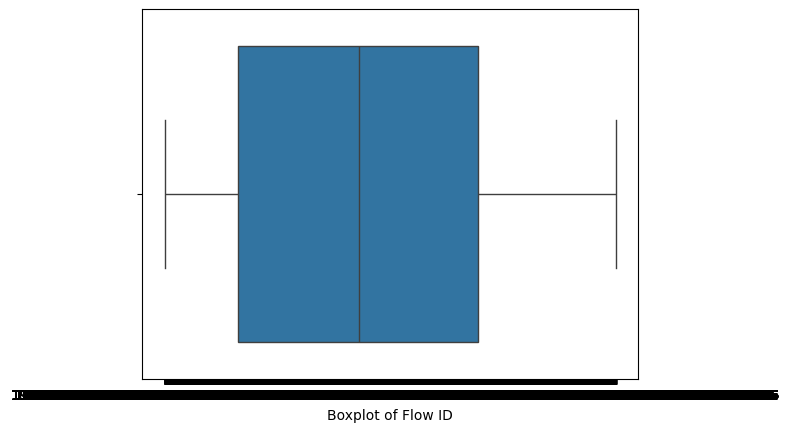

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset the index of the dataframe to ensure a unique index (already suggested, keeping it)
data = data.reset_index(drop=True)

# Inspect the unique values and their counts in the target column
print("\nUnique values and their counts in ' Flow Packets/s':")
print(data['Flow ID'].value_counts())

# Replace 'Flow Packets/s' with the correct column name if it's different
# We will keep the plotting code as is for now, but the inspection above will help
# diagnose the issue. If there are a huge number of identical values, particularly 0,
# we might need to consider different plotting approaches or data transformations.
sns.boxplot(x = data["Flow ID"])
plt.xlabel("Boxplot of Flow ID")
plt.show()

In [18]:

for col in data.columns:
    if data[col].isna().sum() > 0:
        if data[col].dtype in ['int64', 'float64']:
            median_val = data[col].median()
            data[col] = data[col].fillna(median_val)
        elif data[col].dtype == 'object':
            mode_val = data[col].mode()[0]
            data[col] = data[col].fillna(mode_val)

missing_val_after = data.isna().sum()
print("\nMissing values after imputation:")
print(missing_val_after[missing_val_after > 0])



Missing values after imputation:
Series([], dtype: int64)


In [19]:
data.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Length',
       'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
       'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
       'Packet Length Std', 'Packet Len

In [20]:
data['Activity'].unique()

array(['Normal', 'Network Scan', 'Backdoor', 'BENIGN',
       'Account Discovery', 'Directory Bruteforce',
       'Web Vulnerability Scan', 'Account Bruteforce', 'SQL Injection',
       'CSRF', 'Malware Download', 'Command Injection',
       'Data Exfiltration'], dtype=object)

In [21]:
data['Activity'].value_counts()

Activity
Normal                    42459
BENIGN                    19454
Directory Bruteforce       9970
Network Scan               7742
Web Vulnerability Scan     2574
Account Bruteforce          141
Account Discovery           136
SQL Injection                55
Backdoor                     20
Command Injection            12
CSRF                          7
Data Exfiltration             6
Malware Download              2
Name: count, dtype: int64

In [22]:


activity_attack_map = {
    'Normal': 'BENIGN',
    'BENIGN': 'BENIGN',
    'Directory Bruteforce': 'Bruteforce',
    'Network Scan': 'Scan',
    'Web Vulnerability Scan': 'Scan',
    'Account Bruteforce': 'Bruteforce',
    'Account Discovery': 'Discovery',
    'SQL Injection': 'Injection',
    'Backdoor': 'Malware',
    'Command Injection': 'Injection',
    'CSRF': 'Injection',
    'Data Exfiltration': 'Exfiltration',
    'Malware Download': 'Malware'
}

data['Attack Type'] = data['Activity'].map(activity_attack_map)

In [23]:
data.drop('Activity', axis = 1, inplace = True)

In [24]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Attack Number'] = le.fit_transform(data['Attack Type'])

print(data['Attack Number'].unique())

[0 6 5 2 1 4 3]


In [25]:
# Printing corresponding attack type for each encoded value
encoded_values = data['Attack Number'].unique()
for val in sorted(encoded_values):
    print(f"{val}: {le.inverse_transform([val])[0]}")

0: BENIGN
1: Bruteforce
2: Discovery
3: Exfiltration
4: Injection
5: Malware
6: Scan


In [26]:
# prompt: remove nan value colums like Fwd PSH Flags Fwd URG Flags
# Bwd URG Flags,URG Flag Count,Fwd Bytes/Bulk Avg
# Fwd Packet/Bulk Avg
# Fwd Bulk Rate Avg
# Bwd B
# Bwd Bulk Rate Avg

columns_to_drop = [
    'Fwd PSH Flags',
    'Fwd URG Flags',
    'Bwd URG Flags',
    'URG Flag Count',
    'Fwd Bytes/Bulk Avg',
    'Fwd Packet/Bulk Avg',
    'Fwd Bulk Rate Avg',
    'Bwd Avg Bulk Bytes',
    'Bwd Avg Bulk Packets',
    'Bwd Bulk Rate Avg',
    'FWD Init Win Bytes',
    'Fwd Seg Size Min',
    'Bwd Bytes/Bulk Avg',
    'Bwd Packet/Bulk Avg'
]

# Remove columns if they exist in the dataframe
data.drop(columns=columns_to_drop, errors='ignore', inplace=True)

print(f"Shape after dropping columns: {data.shape}")


Shape after dropping columns: (82578, 74)


In [27]:
corr = data.corr(numeric_only = True).round(2)
corr.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

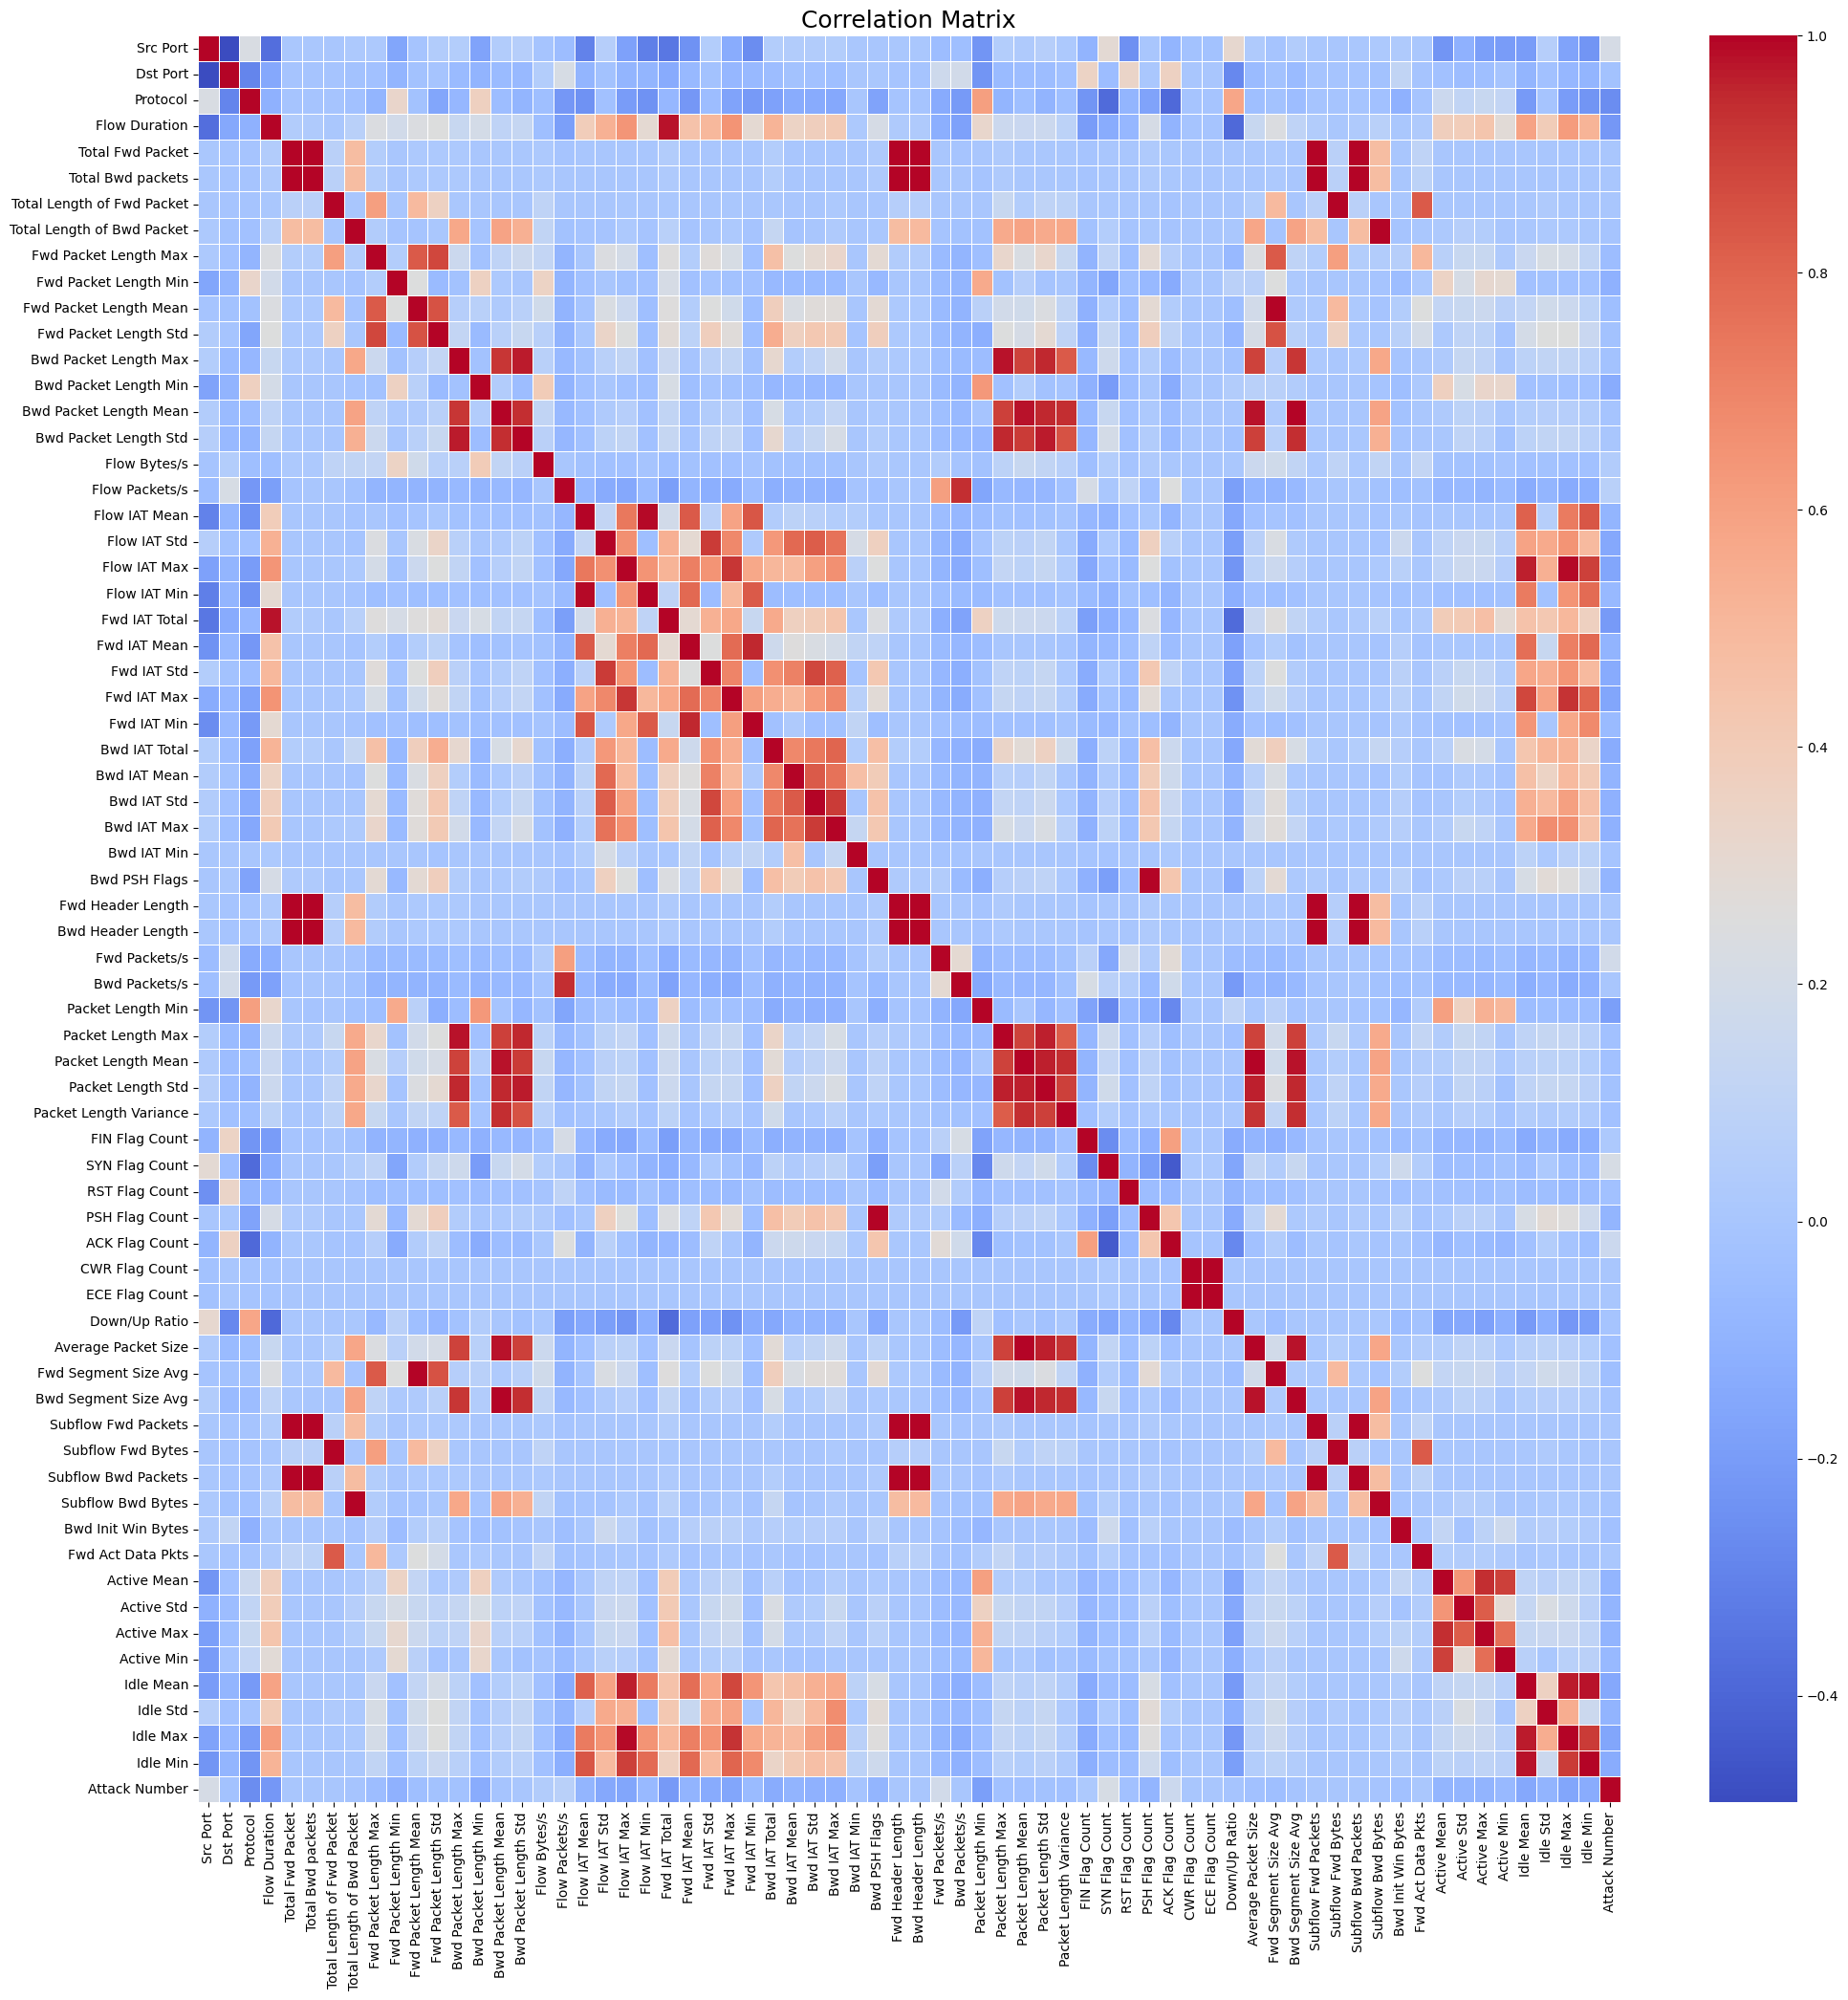

In [28]:
fig, ax = plt.subplots(figsize = (24, 24))
sns.heatmap(corr, cmap = 'coolwarm', annot = False, linewidth = 0.5)
plt.title('Correlation Matrix', fontsize = 18)
plt.show()

In [29]:
# Positive correlation features for 'Attack Number'
pos_corr_features = corr['Attack Number'][(corr['Attack Number'] > 0) & (corr['Attack Number'] < 1)].index.tolist()

print("Features with positive correlation with 'Attack Number':\n")
for i, feature in enumerate(pos_corr_features, start = 1):
    corr_value = corr.loc[feature, 'Attack Number']
    print('{:<3} {:<24} :{}'.format(f'{i}.', feature, corr_value))

Features with positive correlation with 'Attack Number':

1.  Src Port                 :0.21
2.  Flow Bytes/s             :0.04
3.  Flow Packets/s           :0.07
4.  Fwd Packets/s            :0.19
5.  FIN Flag Count           :0.02
6.  SYN Flag Count           :0.22
7.  ACK Flag Count           :0.16
8.  Fwd Act Data Pkts        :0.01


In [30]:
print(f'Number of considerable important features: {len(pos_corr_features)}')

Number of considerable important features: 8


In [31]:
# Data sampling for data analysis
sample_size = int(0.2 * len(data)) # 20% of the original size
sampled_data = data.sample(n = sample_size, replace = False, random_state = 0)
sampled_data.shape

(16515, 74)

In [32]:
# To assess if a sample is representative of the population and comparison of descriptive statistics (mean)
numeric_cols = data.select_dtypes(include = [np.number]).columns.tolist()
print('Descriptive Statistics Comparison (mean):\n')
print('{:<32s}{:<22s}{:<22s}{}'.format('Feature', 'Original Dataset', 'Sampled Dataset', 'Variation Percentage'))
print('-' * 96)

high_variations = []
for col in numeric_cols:
    old = data[col].describe()[1]
    new = sampled_data[col].describe()[1]
    if old == 0:
        pct = 0
    else:
        pct = abs((new - old) / old)
    if pct * 100 > 5:
        high_variations.append((col, pct * 100))
    print('{:<32s}{:<22.6f}{:<22.6f}{:<2.2%}'.format(col, old, new, pct))

Descriptive Statistics Comparison (mean):

Feature                         Original Dataset      Sampled Dataset       Variation Percentage
------------------------------------------------------------------------------------------------
Src Port                        39894.298469          39902.623736          0.02%
Dst Port                        8138.331759           8035.043899           1.27%
Protocol                        9.146044              9.196912              0.56%
Flow Duration                   20523922.491051       20578097.765668       0.26%
Total Fwd Packet                56.408935             55.552528             1.52%
Total Bwd packets               80.872472             78.605450             2.80%
Total Length of Fwd Packet      20304.185885          2939.403633           85.52%
Total Length of Bwd Packet      43223.742583          49752.944293          15.11%
Fwd Packet Length Max           226.421408            212.212171            6.28%
Fwd Packet Length Min  

<ipython-input-32-580325769>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
<ipython-input-32-580325769>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-32-580325769>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
<ipython-input-32-580325769>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprec

CWR Flag Count                  0.000109              0.000182              66.67%
ECE Flag Count                  0.000109              0.000182              66.67%
Down/Up Ratio                   1.218339              1.226400              0.66%
Average Packet Size             162.787456            162.853165            0.04%
Fwd Segment Size Avg            83.417787             78.679872             5.68%
Bwd Segment Size Avg            203.909415            207.537365            1.78%
Subflow Fwd Packets             56.408935             55.552528             1.52%
Subflow Fwd Bytes               20304.185885          2939.403633           85.52%
Subflow Bwd Packets             80.872472             78.605450             2.80%
Subflow Bwd Bytes               43223.742583          49752.944293          15.11%
Bwd Init Win Bytes              956.962799            918.627309            4.01%
Fwd Act Data Pkts               14.991281             13.278474             11.43%
Active Mean

<ipython-input-32-580325769>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-32-580325769>:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  old = data[col].describe()[1]
<ipython-input-32-580325769>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new = sampled_data[col].describe()[1]
<ipython-input-32-580325769>:9: FutureWarning: Series.__getitem__ treating keys as positions i

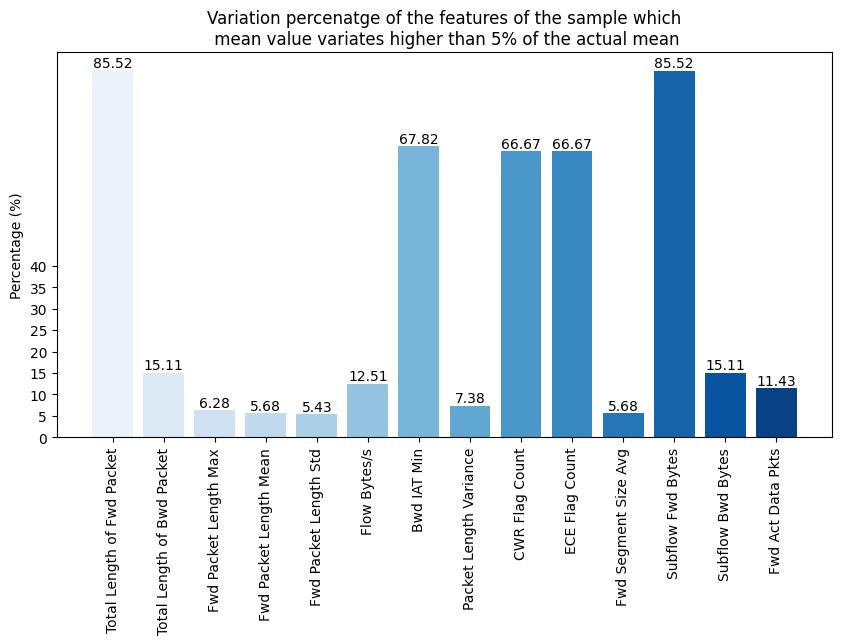

In [33]:
labels = [t[0] for t in high_variations]
values = [t[1] for t in high_variations]

colors = sns.color_palette('Blues', n_colors=len(labels))
fig, ax = plt.subplots(figsize = (10, 5))
ax.bar(labels, values, color = colors)

for i in range(len(labels)):
    ax.text(i, values[i], str(round(values[i], 2)), ha = 'center', va = 'bottom', fontsize = 10)

plt.xticks(rotation = 90)
ax.set_title('Variation percenatge of the features of the sample which\n mean value variates higher than 5% of the actual mean')
ax.set_ylabel('Percentage (%)')
ax.set_yticks(np.arange(0, 41, 5))
plt.show()

In [34]:
# Printing the unique value count
indent = '{:<3} {:<30}: {}'
print('Unique value count for: ')
for i, feature in enumerate(list(sampled_data.columns)[:-1], start = 1):
    print(indent.format(f'{i}.', feature, sampled_data[feature].nunique()))

Unique value count for: 
1.  Flow ID                       : 12689
2.  Src IP                        : 301
3.  Src Port                      : 8886
4.  Dst IP                        : 431
5.  Dst Port                      : 2117
6.  Protocol                      : 3
7.  Timestamp                     : 9068
8.  Flow Duration                 : 10750
9.  Total Fwd Packet              : 300
10. Total Bwd packets             : 289
11. Total Length of Fwd Packet    : 2429
12. Total Length of Bwd Packet    : 2312
13. Fwd Packet Length Max         : 858
14. Fwd Packet Length Min         : 54
15. Fwd Packet Length Mean        : 2835
16. Fwd Packet Length Std         : 3491
17. Bwd Packet Length Max         : 854
18. Bwd Packet Length Min         : 67
19. Bwd Packet Length Mean        : 2585
20. Bwd Packet Length Std         : 3167
21. Flow Bytes/s                  : 9494
22. Flow Packets/s                : 11670
23. Flow IAT Mean                 : 11304
24. Flow IAT Std                  : 11230

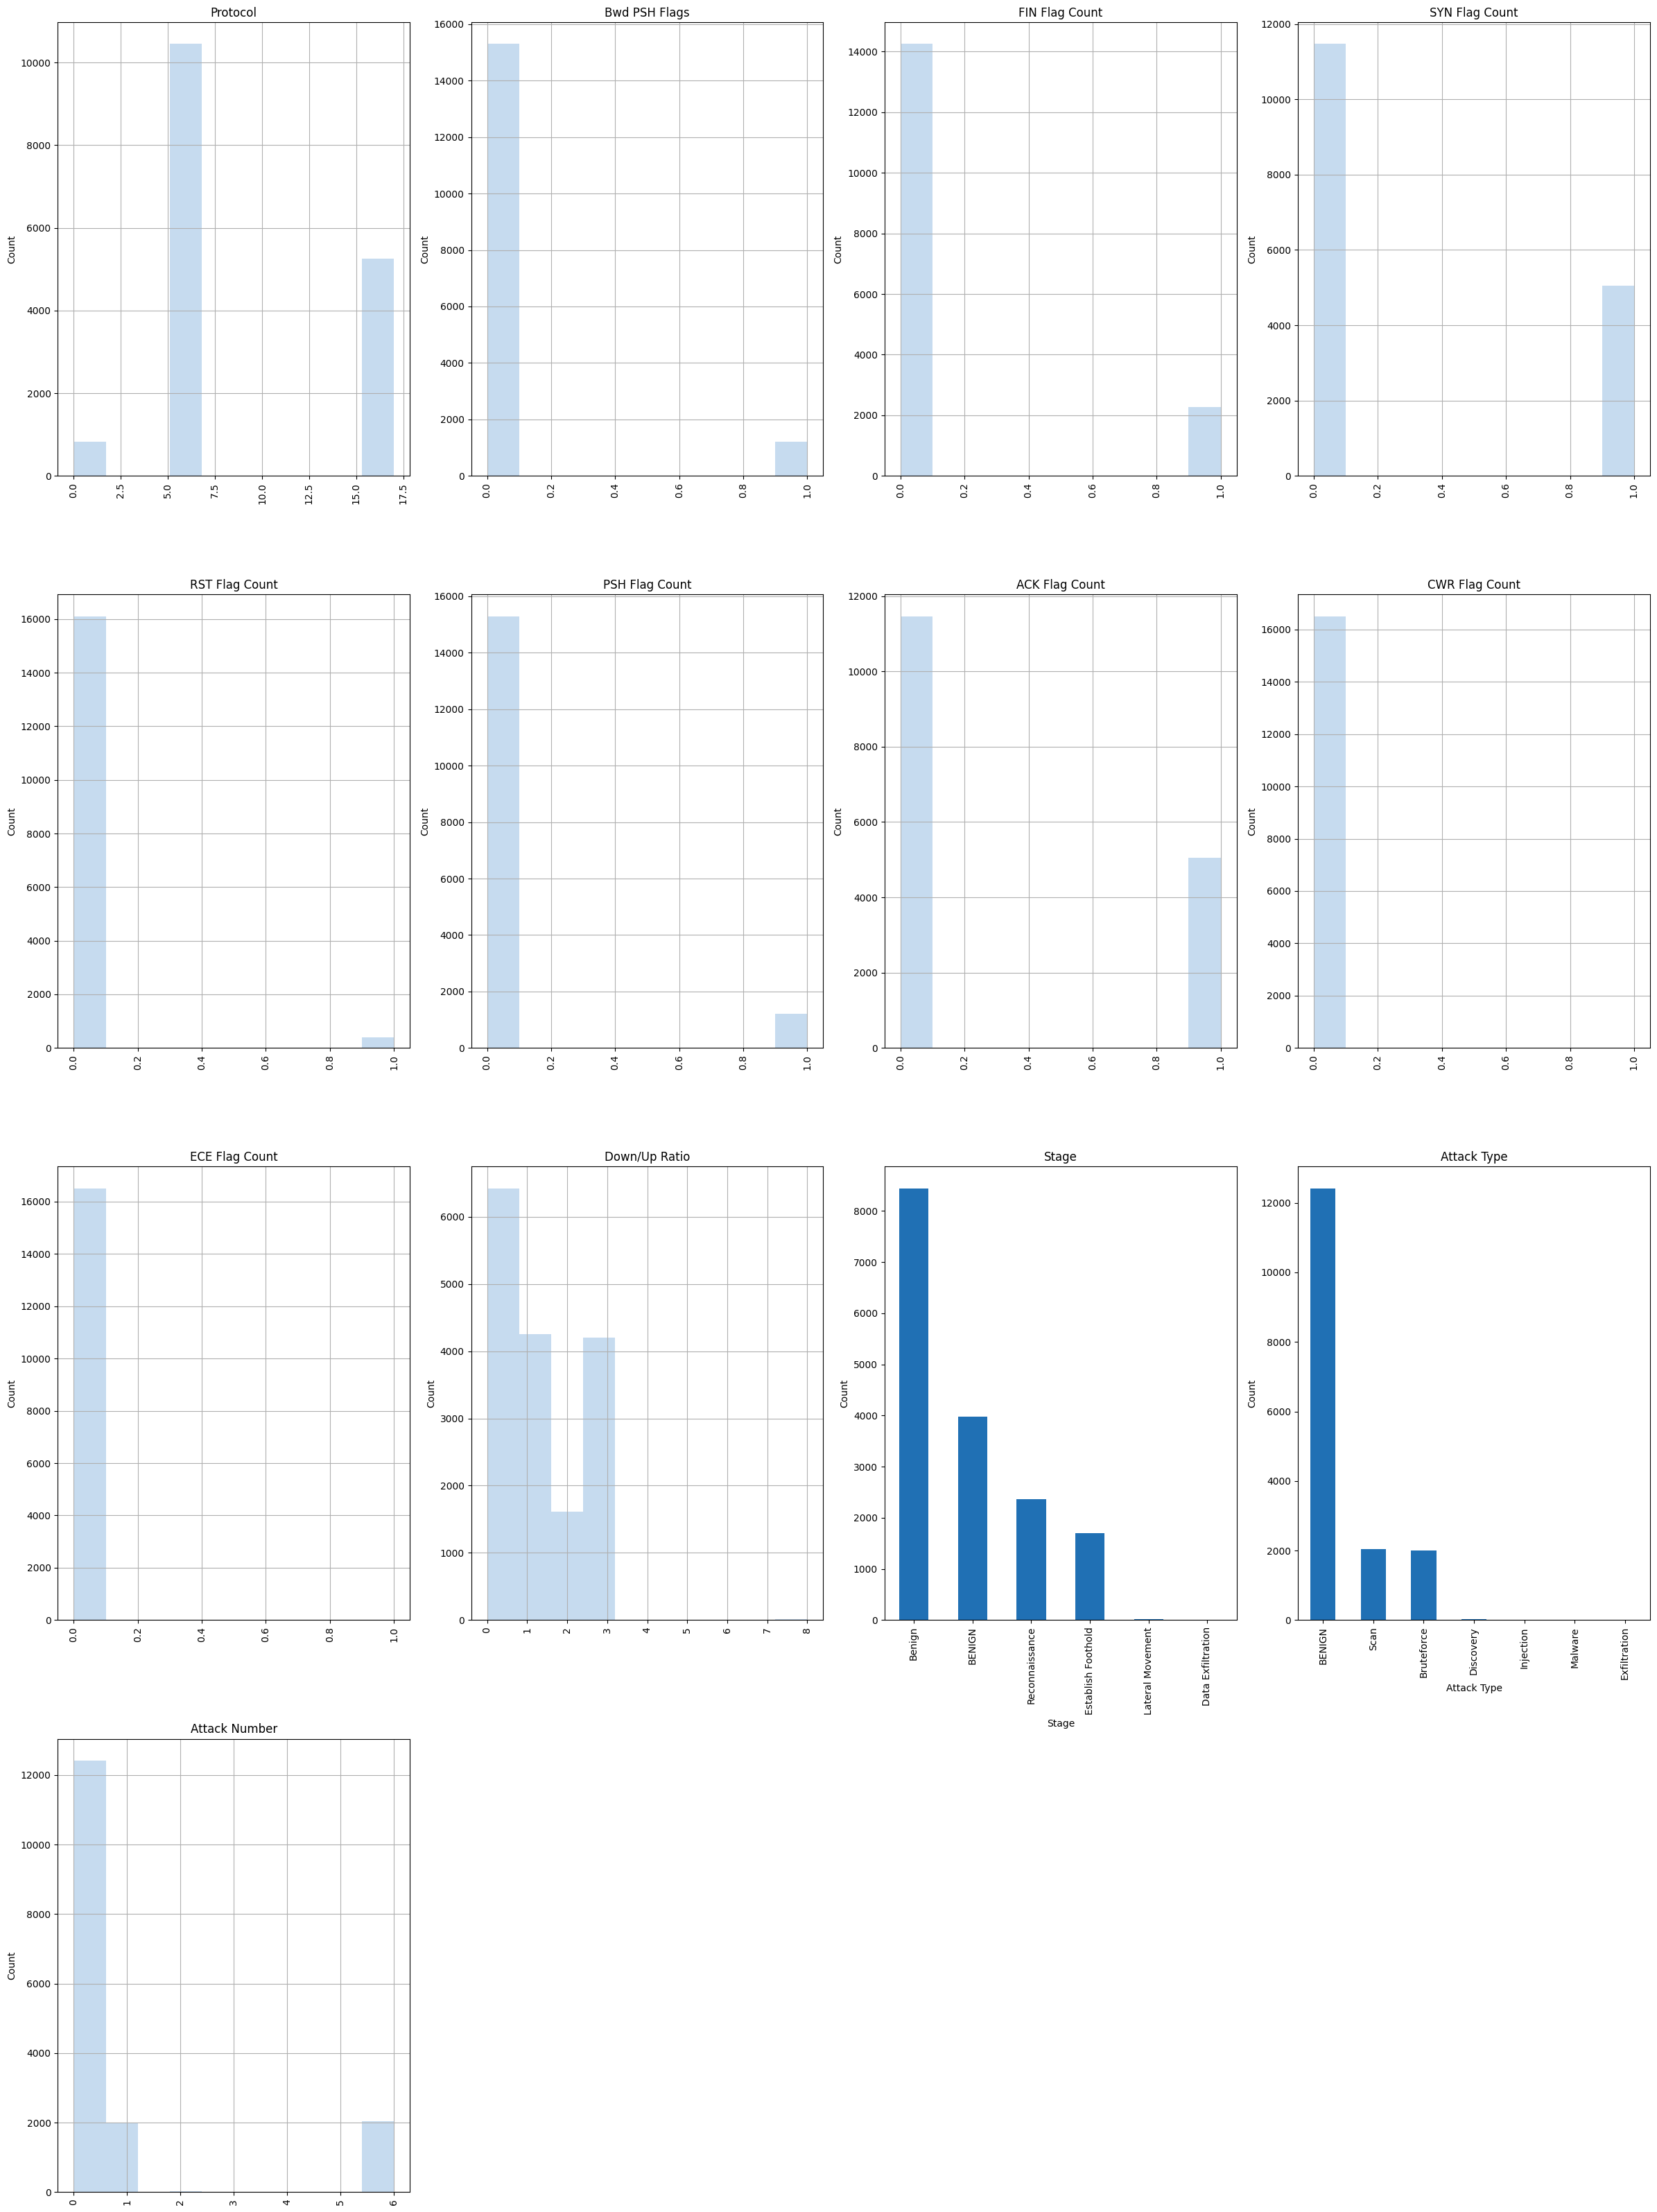

In [35]:
'''Generating a set of visualizations for columns that have more than one unique value but less than 50 unique values.
For categorical columns, a bar plot is generated showing the count of each unique value.
For numerical columns, a histogram is generated.'''
unique_values = sampled_data.nunique()
selected_cols = sampled_data[[col for col in sampled_data if 1 < unique_values[col] < 50]]
rows, cols = selected_cols.shape
col_names = list(selected_cols)
num_of_rows = (cols + 3) // 4

color_palette = sns.color_palette('Blues', n_colors = 3)
plt.figure(figsize = (6 * 4, 8 * num_of_rows))

for i in range(cols):
    plt.subplot(num_of_rows, 4, i + 1)
    col_data = selected_cols.iloc[:, i]
    if col_data.dtype.name == 'object':
        col_data.value_counts().plot(kind = 'bar', color = color_palette[2])
    else:
        col_data.hist(color = color_palette[0])

    plt.ylabel('Count')
    plt.xticks(rotation = 90)
    plt.title(col_names[i])

plt.tight_layout()
plt.show()

In [36]:
# Correlation matrix for sampled data
corr_matrix = sampled_data.corr(numeric_only = True).round(2)
corr_matrix.style.background_gradient(cmap = 'coolwarm', axis = None).format(precision = 2)

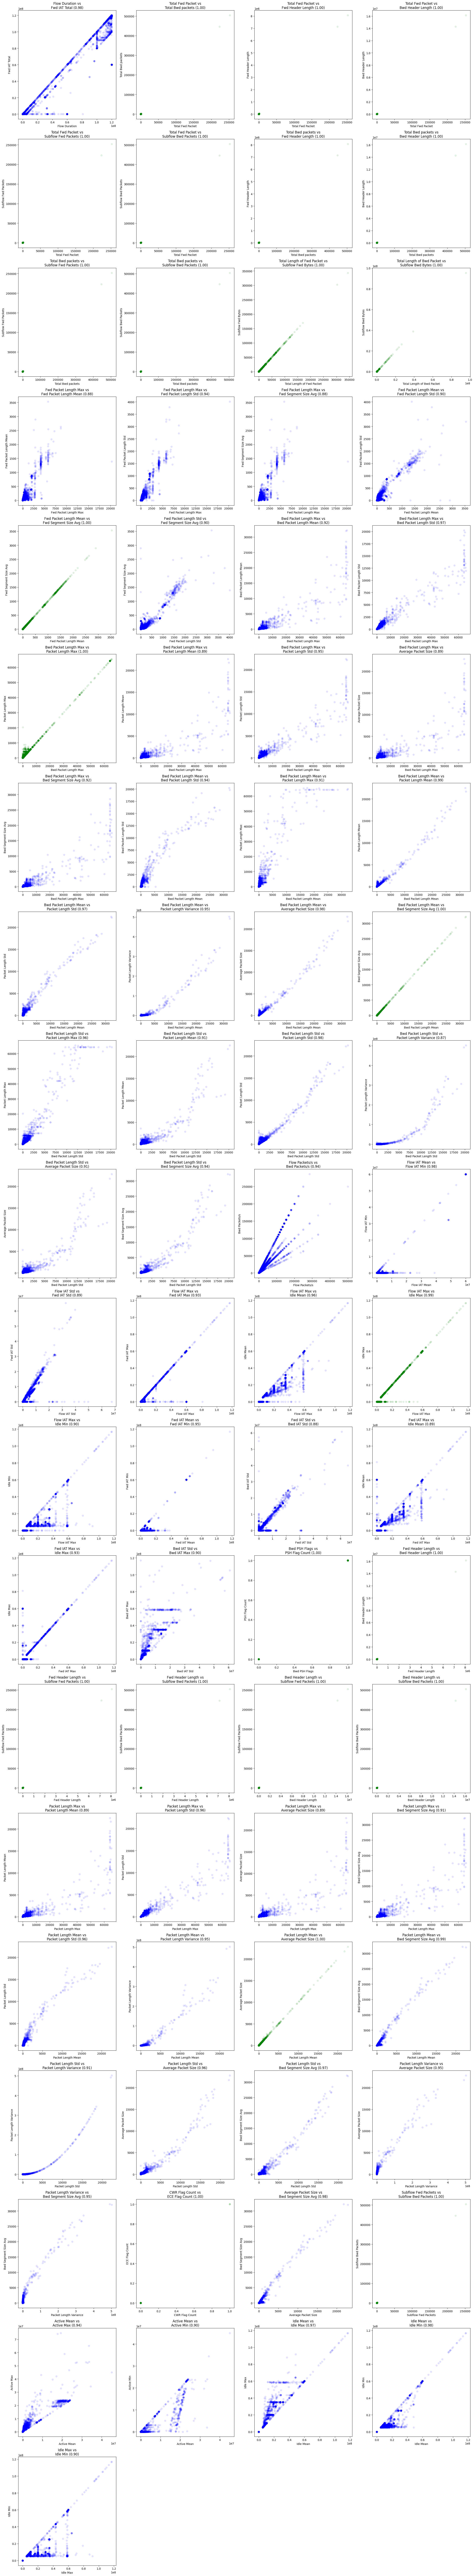

In [37]:
# Plotting the pairs of strongly positive correlated features in the sampled_data that have a correlation coefficient of 0.85 or higher

# Select only numeric columns for correlation calculation
numeric_cols_sampled = sampled_data.select_dtypes(include=np.number).columns.tolist()

high_corr_pairs = []
corr_th = 0.85

# Iterate through the numeric columns
for i in range(len(numeric_cols_sampled)):
  for j in range(i + 1, len(numeric_cols_sampled)):
    col1 = numeric_cols_sampled[i]
    col2 = numeric_cols_sampled[j]
    # Calculate correlation only between numeric columns
    val = sampled_data[col1].corr(sampled_data[col2])
    # If the correlation coefficient is NaN or below the threshold, skip to the next pair
    if np.isnan(val) or val < corr_th:
      continue
    high_corr_pairs.append((val, col1, col2))

size, cols_plot = len(high_corr_pairs), 4 # Renamed 'cols' to 'cols_plot' to avoid conflict with 'numeric_cols_sampled'
rows, rem =  size // cols_plot, size % cols_plot
if rem:
  rows += 1

fig, axs = plt.subplots(rows, cols_plot, figsize = (24, int(size * 1.7)))
# Handle cases where there is only one row or one column for subplots
axs = axs.flatten() if size > 0 else np.array([axs])

for i in range(size):
    try:
        val, x, y = high_corr_pairs[i]
        if val > 0.99:
            axs[i].scatter(sampled_data[x], sampled_data[y], color = 'green', alpha = 0.1)
        else:
            axs[i].scatter(sampled_data[x], sampled_data[y], color = 'blue', alpha = 0.1)
        axs[i].set_xlabel(x)
        axs[i].set_ylabel(y)
        axs[i].set_title(f'{x} vs\n{y} ({val:.2f})')
    except IndexError:
        # This exception should not be reached with the corrected loop size
        pass

# Remove any unused subplots if the number of high_corr_pairs is not a perfect multiple of cols_plot
for j in range(size, rows * cols_plot):
    fig.delaxes(axs[j])


fig.tight_layout()
plt.show()

In [38]:
sampled_data.drop('Attack Number', axis = 1, inplace = True)
data.drop('Attack Number', axis = 1, inplace = True)

In [39]:
# Identifying outliers
numeric_data = sampled_data.select_dtypes(include = ['float', 'int'])
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)
iqr = q3 - q1
outlier = (numeric_data < (q1 - 1.5 * iqr)) | (numeric_data > (q3 + 1.5 * iqr))
outlier_count = outlier.sum()
outlier_percentage = round(outlier.mean() * 100, 2)
outlier_stats = pd.concat([outlier_count, outlier_percentage], axis = 1)
outlier_stats.columns = ['Outlier Count', 'Outlier Percentage']

print(outlier_stats)

                            Outlier Count  Outlier Percentage
Src Port                             2810               17.01
Dst Port                             1624                9.83
Protocol                                0                0.00
Flow Duration                        3904               23.64
Total Fwd Packet                     3473               21.03
Total Bwd packets                    2626               15.90
Total Length of Fwd Packet           3191               19.32
Total Length of Bwd Packet           3408               20.64
Fwd Packet Length Max                1983               12.01
Fwd Packet Length Min                 490                2.97
Fwd Packet Length Mean               1595                9.66
Fwd Packet Length Std                3206               19.41
Bwd Packet Length Max                1960               11.87
Bwd Packet Length Min                 502                3.04
Bwd Packet Length Mean               1899               11.50
Bwd Pack

In [40]:
# Identifying outliers based on attack type
outlier_counts = {}
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        attack_data = sampled_data[i][sampled_data['Attack Type'] == attack_type]
        q1, q3 = np.percentile(attack_data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        num_outliers = ((attack_data < lower_bound) | (attack_data > upper_bound)).sum()
        outlier_percent = num_outliers / len(attack_data) * 100
        outlier_counts[(i, attack_type)] = (num_outliers, outlier_percent)

for i in numeric_data:
  print(f'Feature: {i}')
  for attack_type in sampled_data['Attack Type'].unique():
    num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
    print(f'- {attack_type}: {num_outliers} ({outlier_percent:.2f}%)')
  print()

Feature: Src Port
- BENIGN: 2455 (19.76%)
- Scan: 6 (0.29%)
- Bruteforce: 240 (11.95%)
- Discovery: 1 (4.35%)
- Malware: 1 (25.00%)
- Injection: 0 (0.00%)
- Exfiltration: 0 (0.00%)

Feature: Dst Port
- BENIGN: 1619 (13.03%)
- Scan: 423 (20.69%)
- Bruteforce: 370 (18.43%)
- Discovery: 8 (34.78%)
- Malware: 1 (25.00%)
- Injection: 0 (0.00%)
- Exfiltration: 0 (0.00%)

Feature: Protocol
- BENIGN: 0 (0.00%)
- Scan: 0 (0.00%)
- Bruteforce: 0 (0.00%)
- Discovery: 0 (0.00%)
- Malware: 0 (0.00%)
- Injection: 0 (0.00%)
- Exfiltration: 0 (0.00%)

Feature: Flow Duration
- BENIGN: 2613 (21.04%)
- Scan: 188 (9.20%)
- Bruteforce: 68 (3.39%)
- Discovery: 0 (0.00%)
- Malware: 0 (0.00%)
- Injection: 2 (15.38%)
- Exfiltration: 0 (0.00%)

Feature: Total Fwd Packet
- BENIGN: 2344 (18.87%)
- Scan: 388 (18.98%)
- Bruteforce: 38 (1.89%)
- Discovery: 4 (17.39%)
- Malware: 0 (0.00%)
- Injection: 1 (7.69%)
- Exfiltration: 0 (0.00%)

Feature: Total Bwd packets
- BENIGN: 2378 (19.14%)
- Scan: 380 (18.59%)
- Brutef

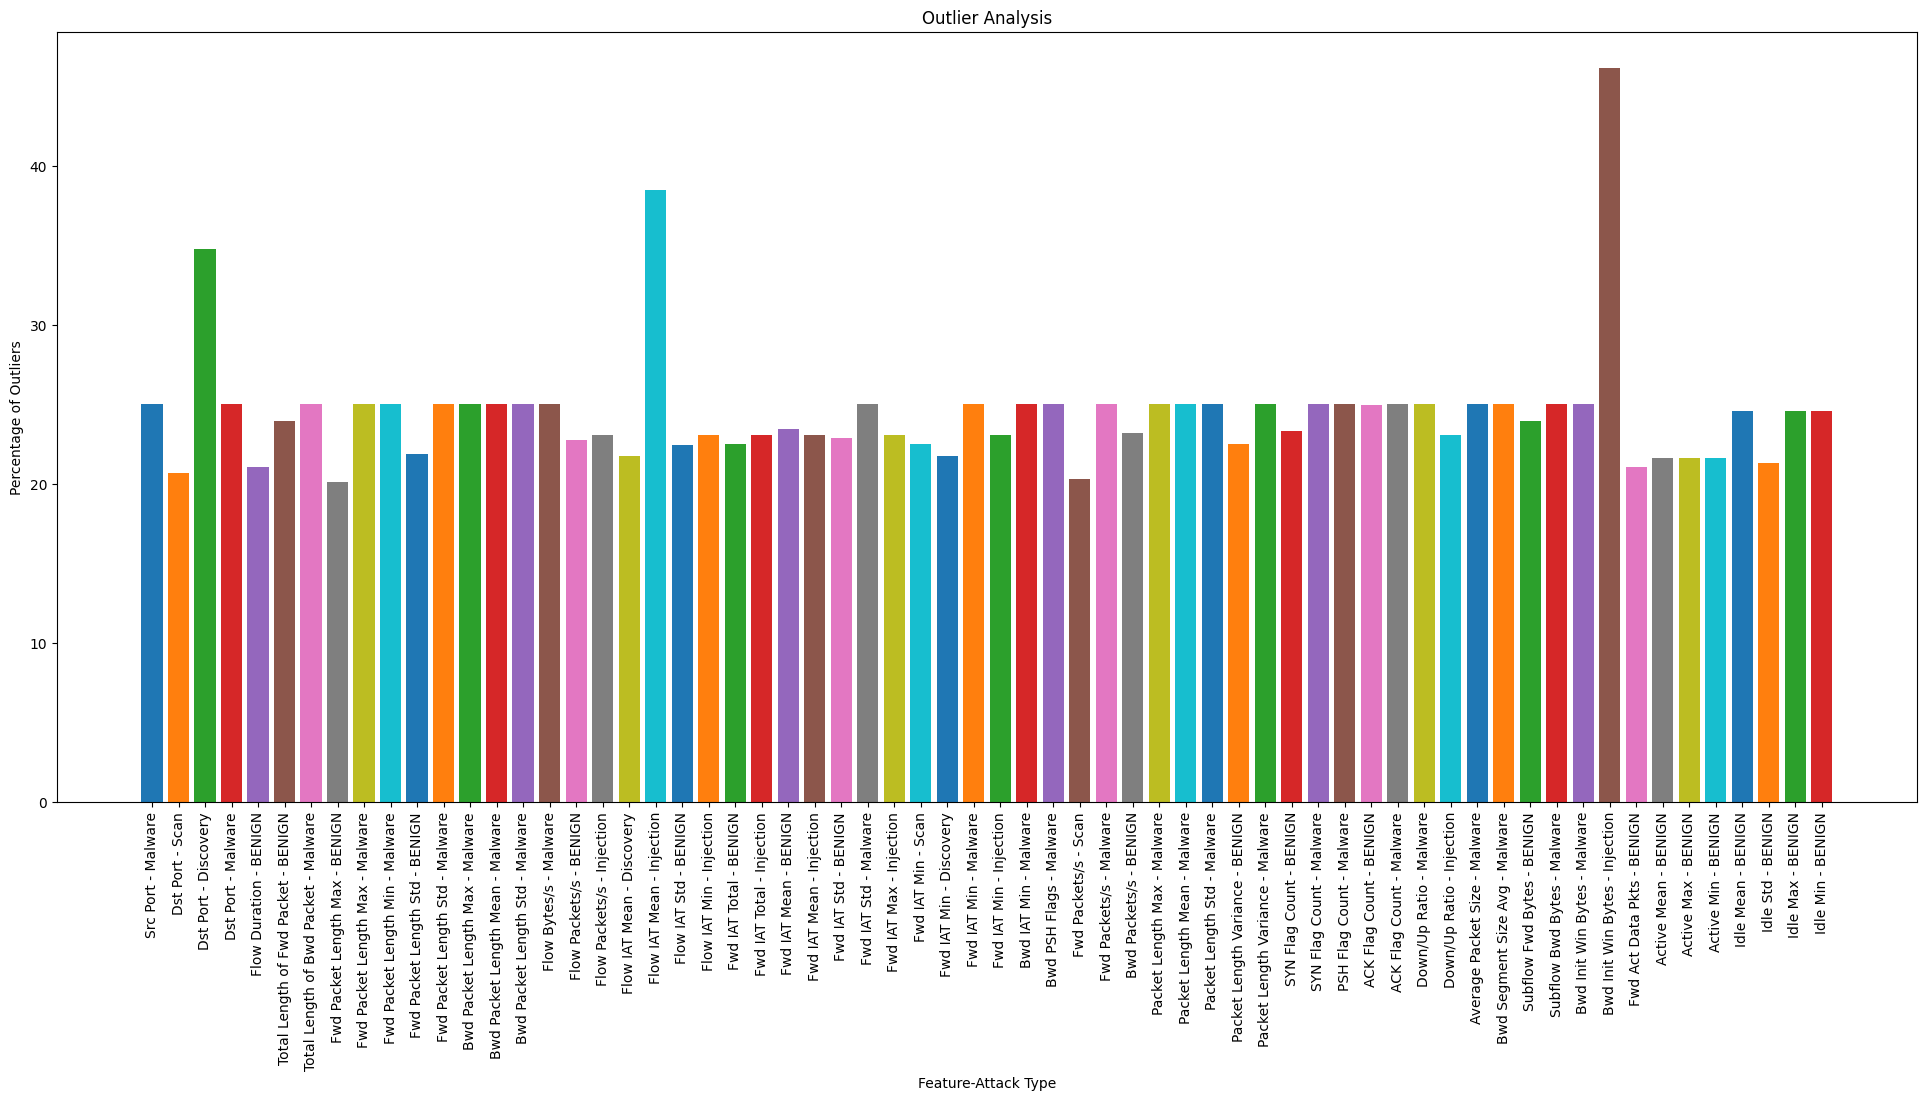

In [41]:
# Plotting the percentage of outliers that are higher than 20%
fig, ax = plt.subplots(figsize = (24, 10))
for i in numeric_data:
    for attack_type in sampled_data['Attack Type'].unique():
        num_outliers, outlier_percent = outlier_counts[(i, attack_type)]
        if outlier_percent > 20:
            ax.bar(f'{i} - {attack_type}', outlier_percent)

ax.set_xlabel('Feature-Attack Type')
ax.set_ylabel('Percentage of Outliers')
ax.set_title('Outlier Analysis')
ax.set_yticks(np.arange(0, 41, 10))
plt.xticks(rotation = 90)
plt.show()

<ipython-input-42-323780027>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)


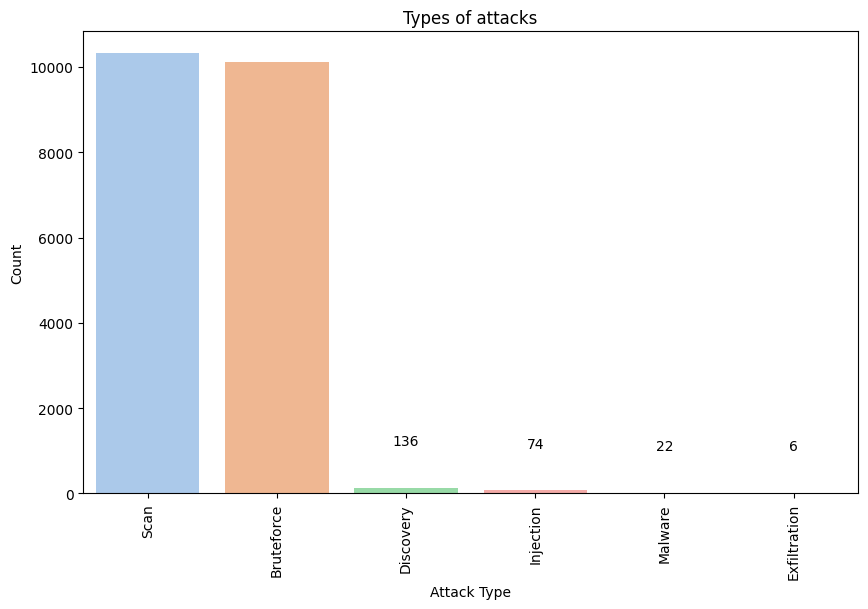

In [42]:
# Different 'Attack Type' in the main dataset excluding 'BENIGN'
attacks = data.loc[data['Attack Type'] != 'BENIGN']

plt.figure(figsize = (10, 6))
ax = sns.countplot(x = 'Attack Type', data = attacks, palette = 'pastel', order = attacks['Attack Type'].value_counts().index)
plt.title('Types of attacks')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2, p.get_height() + 1000), ha = 'center')

plt.show()

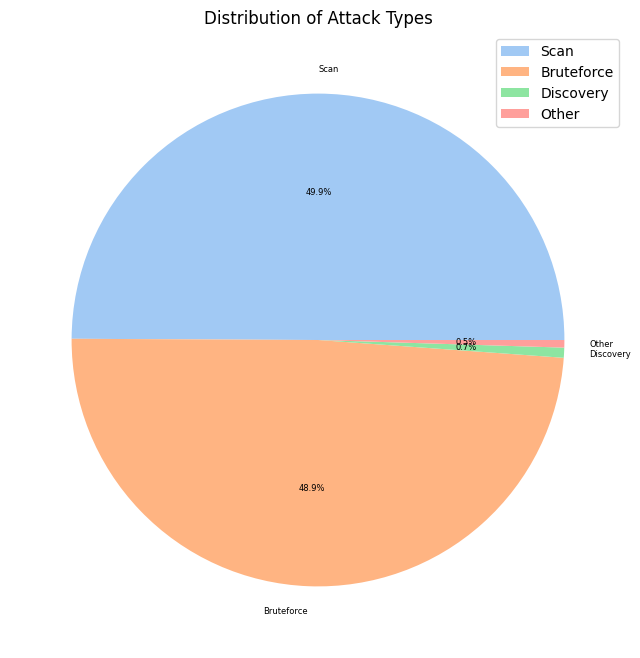

In [43]:
attack_counts = attacks['Attack Type'].value_counts()
threshold = 0.005
percentages = attack_counts / attack_counts.sum()
small_slices = percentages[percentages < threshold].index.tolist()
attack_counts['Other'] = attack_counts[small_slices].sum()
attack_counts.drop(small_slices, inplace = True)

sns.set_palette('pastel')
plt.figure(figsize = (8, 8))
plt.pie(attack_counts.values, labels = attack_counts.index, autopct = '%1.1f%%', textprops={'fontsize': 6})
plt.title('Distribution of Attack Types')
plt.legend(attack_counts.index, loc = 'best')
plt.show()

In [44]:
data.groupby('Attack Type').first()

Flow ID          Src IP  \
Attack Type                                                              
BENIGN                           8.0.6.4-8.6.0.1-0-0-0         8.6.0.1   
Bruteforce     192.168.3.29-206.207.50.50-9002-37668-6   206.207.50.50   
Discovery     192.168.3.29-209.147.138.11-9000-50539-6  209.147.138.11   
Exfiltration  192.168.3.30-206.207.50.50-47046-28643-6   206.207.50.50   
Injection      192.168.3.29-206.207.50.50-9002-39766-6   206.207.50.50   
Malware         192.168.3.29-192.168.3.34-47916-4444-6    192.168.3.29   
Scan          192.168.3.29-209.147.138.38-9000-56646-6  209.147.138.38   

              Src Port        Dst IP  Dst Port  Protocol  \
Attack Type                                                
BENIGN             0.0       8.0.6.4       0.0       0.0   
Bruteforce     37668.0  192.168.3.29    9002.0       6.0   
Discovery      50539.0  192.168.3.29    9000.0       6.0   
Exfiltration   28643.0  192.168.3.30   47046.0       6.0   
Injection      39766.0  192.168.3.29    9002.0       6.0   
Malware        47916.0  192.168.3.34    4444.0       6.0   
Scan           56646.0  192.168.3.29    9000.0       6.0   

                           Timestamp  Flow Duration  Total Fwd Packet  \
Attack Type                                                             
BENIGN        15/07/2019 01:55:21 PM    119998944.0             242.0   
Bruteforce    16/07/2019 05:13:08 PM         2190.0               2.0   
Discovery     16/07/2019 01:45:08 PM      7537949.0              10.0   
Exfiltration  19/07/2019 04:31:47 PM         2746.0               1.0   
Injection     17/07/2019 02:45:40 PM      5033805.0               6.0   
Malware       18/07/2019 08:05:14 PM        22260.0               5.0   
Scan          18/07/2019 02:22:07 PM      6878549.0               7.0   

              Total Bwd packets  ...  Fwd Act Data Pkts  Active Mean  \
Attack Type                      ...                                   
BENIGN                      1.0  ...                0.0          0.0   
Bruteforce                  5.0  ...                1.0          0.0   
Discovery                  11.0  ...                3.0          0.0   
Exfiltration                1.0  ...                0.0          0.0   
Injection                   5.0  ...                2.0          0.0   
Malware                     6.0  ...                4.0          0.0   
Scan                        8.0  ...                2.0          0.0   

              Active Std  Active Max  Active Min  Idle Mean  Idle Std  \
Attack Type                                                             
BENIGN               0.0         0.0         0.0        0.0       0.0   
Bruteforce           0.0         0.0         0.0        0.0       0.0   
Discovery            0.0         0.0         0.0        0.0       0.0   
Exfiltration         0.0         0.0         0.0        0.0       0.0   
Injection            0.0         0.0         0.0        0.0       0.0   
Malware              0.0         0.0         0.0        0.0       0.0   
Scan                 0.0         0.0         0.0        0.0       0.0   

              Idle Max  Idle Min               Stage  
Attack Type                                           
BENIGN             0.0       0.0              Benign  
Bruteforce         0.0       0.0      Reconnaissance  
Discovery          0.0       0.0      Reconnaissance  
Exfiltration       0.0       0.0   Data Exfiltration  
Injection          0.0       0.0  Establish Foothold  
Malware            0.0       0.0    Lateral Movement  
Scan               0.0       0.0    Lateral Movement  

[7 rows x 72 columns]

In [45]:
data.columns

Index(['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
       'Timestamp', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Bwd PSH Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 

Graph Construction

 Nodes
Define what each node represents:

Option 1: IP addresses (Src IP and Dst IP) — Each IP is a node.

Option 2: Flows — Each Flow ID is a node (less common for GCNs, better for GAT/GraphSAGE).

Option 3: Devices — Derive based on IPs and Ports.

Usually for APT detection, IP-address-based nodes are most useful.

Edges
Define what an edge means:

An edge exists between Src IP and Dst IP if there's a flow.

You can add features like:

Number of flows

Average packet size

Total bytes transferred

Label (malicious/benign)

 Edge Features
You can summarize flow features over the edge:

Avg. packet size

Flow duration

Count of flows

Ports used

Protocol (maybe as one-hot)

 Node Features
Aggregate features per IP (node):

Total outgoing flows

Total incoming flows

Avg duration

Flag counts (SYN, ACK, etc.)

Use groupby('Src IP') or groupby('Dst IP') for aggregation



In [46]:
pip install torch torch-geometric pandas scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 66.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12


In [47]:

import os

output_folder = "cleaned_data"
os.makedirs(output_folder, exist_ok=True)

# Save the cleaned DataFrame as a CSV file
data.to_csv(os.path.join(output_folder, "cleaned_dataframe.csv"), index=False)

print(f"Cleaned data saved to the folder: {output_folder}")
print(f"File path: {os.path.join(output_folder, 'cleaned_dataframe.csv')}")

Cleaned data saved to the folder: cleaned_data
File path: cleaned_data/cleaned_dataframe.csv


In [48]:
data=pd.read_csv('cleaned_data/cleaned_dataframe.csv')


**1. Data Preparation**

**2. Model Architecture (GNN-Transformer Hybrid)**

**3. Training with DAPT (Domain-Adaptive Pre-Training)**

**4. Slow Attack Detection Enhancement**

**5. Evaluation**

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow ID                     2618 non-null   object 
 1   Src IP                      2618 non-null   object 
 2   Src Port                    2618 non-null   int64  
 3   Dst IP                      2618 non-null   object 
 4   Dst Port                    2618 non-null   int64  
 5   Protocol                    2618 non-null   int64  
 6   Timestamp                   2618 non-null   object 
 7   Flow Duration               2618 non-null   int64  
 8   Total Fwd Packet            2618 non-null   int64  
 9   Total Bwd packets           2618 non-null   int64  
 10  Total Length of Fwd Packet  2618 non-null   float64
 11  Total Length of Bwd Packet  2618 non-null   float64
 12  Fwd Packet Length Max       2618 non-null   float64
 13  Fwd Packet Length Min       2618 

In [50]:


# List columns with 'object' dtype
object_cols = data.select_dtypes(include=['object']).columns
print("Columns with object dtype:")
object_cols


Columns with object dtype:


Index(['Flow ID', 'Src IP', 'Dst IP', 'Timestamp', 'Stage', 'Attack Type'], dtype='object')

In [51]:
import socket
import struct

def ip_to_int(ip_address):
  """Converts an IPv4 address string to an integer."""
  try:
    return struct.unpack("!I", socket.inet_aton(ip_address))[0]
  except socket.error:
    # Handle potential errors for invalid IP addresses
    return np.nan # or raise an error, or return a specific value

# Apply the conversion function to the IP columns
data['Src IP_int'] = data['Src IP'].apply(ip_to_int)
data['Dst IP_int'] = data['Dst IP'].apply(ip_to_int)

# Drop the original object columns
data.drop(['Src IP', 'Dst IP'], axis=1, inplace=True)

# Display the first few rows with the new integer columns and dropped columns
print(data.head())

# Verify the data types of the new columns
print(data[['Src IP_int', 'Dst IP_int']].info())

                                  Flow ID  Src Port  Dst Port  Protocol  \
0                   8.0.6.4-8.6.0.1-0-0-0       0.0       0.0       0.0   
1  192.168.3.10-239.2.11.71-53569-8662-17   53569.0    8662.0      17.0   
2        255.255.255.255-0.0.0.0-67-68-17      68.0      67.0      17.0   
3  192.168.3.30-192.168.3.31-40504-9200-6   40504.0    9200.0       6.0   
4              0.87.248.248-3.0.0.0-0-0-0       0.0       0.0       0.0   

                Timestamp  Flow Duration  Total Fwd Packet  Total Bwd packets  \
0  15/07/2019 01:55:21 PM    119998944.0             242.0                1.0   
1  15/07/2019 01:55:22 PM    109235816.0              21.0                1.0   
2  15/07/2019 01:55:22 PM    119764062.0              88.0                1.0   
3  15/07/2019 01:55:23 PM    117030424.0              18.0               17.0   
4  15/07/2019 01:55:58 PM    119999703.0               2.0                1.0   

   Total Length of Fwd Packet  Total Length of Bwd Packet  ...

In [52]:
# prompt: convert time stamp in date and time integer hours

data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Timestamp_hours'] = data['Timestamp'].dt.hour.astype(int)
print(data[['Timestamp', 'Timestamp_hours']].head())


<ipython-input-52-3344297810>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Timestamp'] = pd.to_datetime(data['Timestamp'])


            Timestamp  Timestamp_hours
0 2019-07-15 13:55:21               13
1 2019-07-15 13:55:22               13
2 2019-07-15 13:55:22               13
3 2019-07-15 13:55:23               13
4 2019-07-15 13:55:58               13


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2618 entries, 0 to 2617
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Flow ID                     2618 non-null   object 
 1   Src IP                      2618 non-null   object 
 2   Src Port                    2618 non-null   int64  
 3   Dst IP                      2618 non-null   object 
 4   Dst Port                    2618 non-null   int64  
 5   Protocol                    2618 non-null   int64  
 6   Timestamp                   2618 non-null   object 
 7   Flow Duration               2618 non-null   int64  
 8   Total Fwd Packet            2618 non-null   int64  
 9   Total Bwd packets           2618 non-null   int64  
 10  Total Length of Fwd Packet  2618 non-null   float64
 11  Total Length of Bwd Packet  2618 non-null   float64
 12  Fwd Packet Length Max       2618 non-null   float64
 13  Fwd Packet Length Min       2618 

In [54]:
# prompt: IN STAGE MARK BENIGN AND Benign to be same or convert in one form only

data['Stage'] = data['Stage'].str.upper()
print(data['Stage'].value_counts())


Stage
BENIGN                61913
RECONNAISSANCE        11909
ESTABLISH FOOTHOLD     8604
LATERAL MOVEMENT        137
DATA EXFILTRATION        15
Name: count, dtype: int64


In [55]:

le_activity = LabelEncoder()
le_stage = LabelEncoder()

data['activity_int'] = le_activity.fit_transform(data['Attack Type'])
data['stage_int'] = le_stage.fit_transform(data['Stage'])

data.drop(['Attack Type', 'Stage'], axis=1, inplace=True)

print("\nDataframe after encoding 'Activity' and 'Stage' and dropping original columns:")
print(data.head())
print("\nEncoded Activity values and their original labels:")
for i in range(len(le_activity.classes_)):
    print(f"{i}: {le_activity.classes_[i]}")

print("\nEncoded Stage values and their original labels:")
for i in range(len(le_stage.classes_)):
    print(f"{i}: {le_stage.classes_[i]}")



Dataframe after encoding 'Activity' and 'Stage' and dropping original columns:
                                  Flow ID  Src Port  Dst Port  Protocol  \
0                   8.0.6.4-8.6.0.1-0-0-0       0.0       0.0       0.0   
1  192.168.3.10-239.2.11.71-53569-8662-17   53569.0    8662.0      17.0   
2        255.255.255.255-0.0.0.0-67-68-17      68.0      67.0      17.0   
3  192.168.3.30-192.168.3.31-40504-9200-6   40504.0    9200.0       6.0   
4              0.87.248.248-3.0.0.0-0-0-0       0.0       0.0       0.0   

            Timestamp  Flow Duration  Total Fwd Packet  Total Bwd packets  \
0 2019-07-15 13:55:21    119998944.0             242.0                1.0   
1 2019-07-15 13:55:22    109235816.0              21.0                1.0   
2 2019-07-15 13:55:22    119764062.0              88.0                1.0   
3 2019-07-15 13:55:23    117030424.0              18.0               17.0   
4 2019-07-15 13:55:58    119999703.0               2.0                1.0   

   Tot

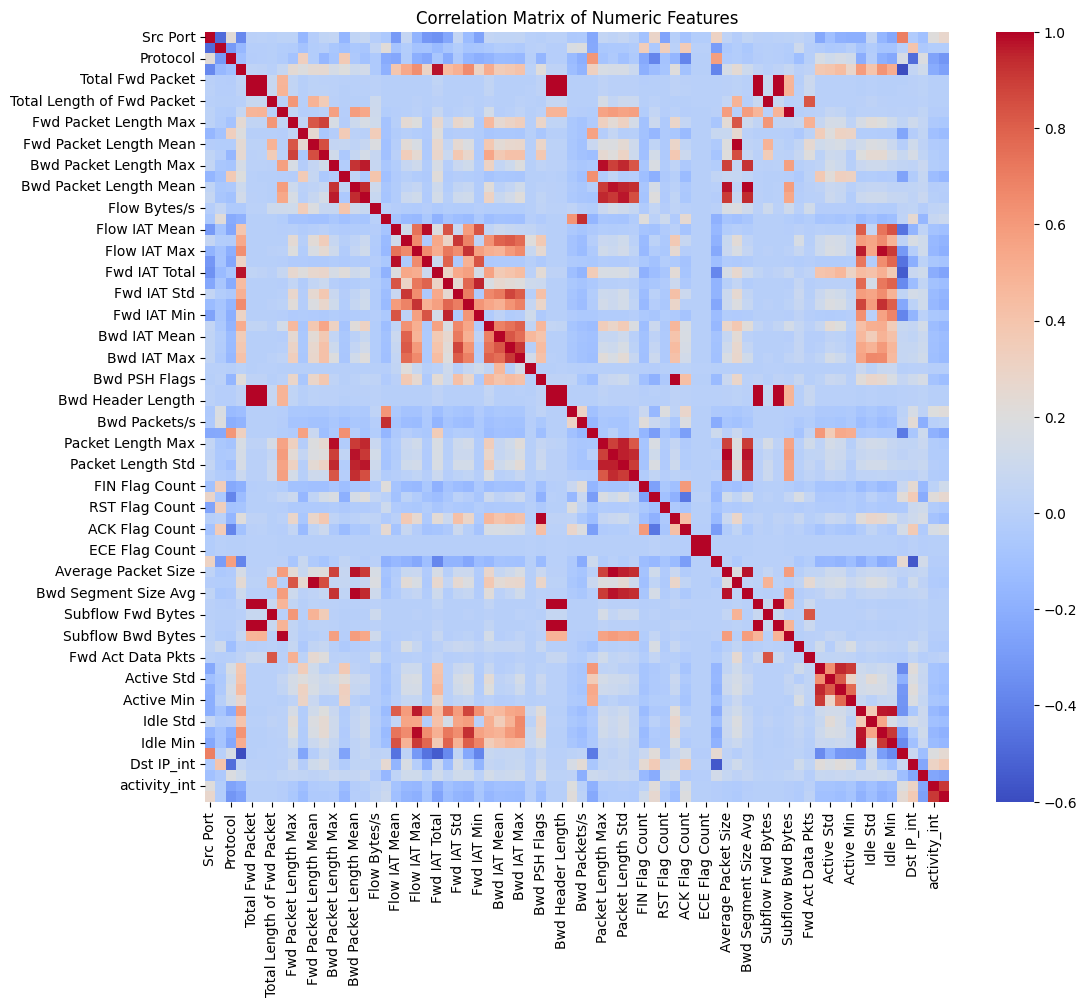

In [56]:
# prompt: create a correlation map

# Select only the numeric columns for correlation calculation
numeric_cols = data.select_dtypes(include=np.number)

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False) # Set annot to False for readability with many features
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [57]:

# Find features with positive correlation with 'activity_int'
pos_corr_activity = corr_matrix['activity_int'][(corr_matrix['activity_int'] > 0) & (corr_matrix['activity_int'] < 1)].sort_values(ascending=False)

print("Features with positive correlation with 'activity_int':\n")
pos_corr_activity

Features with positive correlation with 'activity_int':



stage_int            0.908184
Dst IP_int           0.302216
SYN Flag Count       0.216595
Src Port             0.211105
Fwd Packets/s        0.194591
Src IP_int           0.189068
ACK Flag Count       0.156864
Flow Packets/s       0.072586
Flow Bytes/s         0.035668
FIN Flag Count       0.023184
Fwd Act Data Pkts    0.011189
Bwd Packets/s        0.001001
Name: activity_int, dtype: float64

In [58]:

from imblearn.under_sampling import RandomUnderSampler

# Separate features (X) and target (y)
X = data.drop('activity_int', axis=1)
y = data['activity_int']

# Identify the minority class(es) and majority class
class_counts = y.value_counts()
majority_class = class_counts.idxmax()
minority_classes = class_counts[class_counts != class_counts.max()].index.tolist()

print("Original dataset shape:", data.shape)
print("Original class distribution:\n", class_counts)

# Find the count of the second largest class
if len(class_counts) > 1:
    second_largest_count = class_counts.nlargest(2).iloc[-1]
    # Create a dictionary for the sampling strategy
    sampling_strategy_dict = {majority_class: second_largest_count}
    # Keep all other classes as they are (or undersample them less drastically)
    for minor_class in minority_classes:
         sampling_strategy_dict[minor_class] = class_counts[minor_class]
else:
    # If only one class, undersampling is not applicable/useful
    sampling_strategy_dict = 'auto' # Or handle this case differently


rus = RandomUnderSampler(sampling_strategy=sampling_strategy_dict, random_state=42)

# Apply undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)

print("\nResampled dataset shape:", X_resampled.shape)
print("Resampled class distribution:\n", y_resampled.value_counts())

# You can now use X_resampled and y_resampled for model training
# If you need a combined dataframe:
resampled_data = X_resampled.copy()
resampled_data['activity_int'] = y_resampled
print("\nResampled DataFrame shape:", resampled_data.shape)
print("Resampled DataFrame head:\n", resampled_data.head())

Original dataset shape: (82578, 74)
Original class distribution:
 activity_int
0    61913
6    10316
1    10111
2      136
4       74
5       22
3        6
Name: count, dtype: int64

Resampled dataset shape: (30981, 73)
Resampled class distribution:
 activity_int
0    10316
6    10316
1    10111
2      136
4       74
5       22
3        6
Name: count, dtype: int64

Resampled DataFrame shape: (30981, 74)
Resampled DataFrame head:
                                        Flow ID  Src Port  Dst Port  Protocol  \
15087         192.168.3.29-8.8.8.8-60530-53-17   60530.0      53.0      17.0   
7829          192.168.3.29-8.8.8.8-58239-53-17   58239.0      53.0      17.0   
28750  192.168.3.29-206.207.50.50-9002-36344-6   36344.0    9002.0       6.0   
70421   192.168.3.30-192.168.3.34-8081-51096-6   51096.0    8081.0       6.0   
12351         255.255.255.255-0.0.0.0-67-68-17      68.0      67.0      17.0   

                Timestamp  Flow Duration  Total Fwd Packet  Total Bwd packets  \
1508

In [59]:
import networkx as nx

In [60]:
G = nx.Graph()

In [61]:
for idx, row in full_df.iterrows():
    G.add_edge(row['Src IP'], row['Dst IP'], protocol=row['Protocol'], port=row['Dst Port'])

In [62]:
for idx, row in full_df.iterrows():
    G.add_edge(
        row['Src IP'],
        row['Dst IP'],
        protocol=row['Protocol'],
        src_port=row['Src Port'],
        dst_port=row['Dst Port'],
        flow_duration=row['Flow Duration'],
        fwd_packets=row['Total Fwd Packet'],
        bwd_packets=row['Total Bwd packets']
    )

In [63]:
print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())
print("Sample edges:", list(G.edges(data=True))[:5])

Nodes: 766
Edges: 791
Sample edges: [('8.6.0.1', '8.0.6.4', {'protocol': 0.0, 'port': 0.0, 'src_port': 0.0, 'dst_port': 0.0, 'flow_duration': 34546564.0, 'fwd_packets': 63.0, 'bwd_packets': 1.0}), ('192.168.3.10', '239.2.11.71', {'protocol': 17.0, 'port': 8662.0, 'src_port': 53569.0, 'dst_port': 8662.0, 'flow_duration': 60027479.0, 'fwd_packets': 15.0, 'bwd_packets': 1.0}), ('0.0.0.0', '255.255.255.255', {'protocol': 17.0, 'port': 67.0, 'src_port': 68.0, 'dst_port': 67.0, 'flow_duration': 25549012.0, 'fwd_packets': 16.0, 'bwd_packets': 1.0}), ('192.168.3.30', '192.168.3.31', {'protocol': 6.0, 'port': 9200.0, 'src_port': 42004.0, 'dst_port': 9200.0, 'flow_duration': 19796557.0, 'fwd_packets': 5.0, 'bwd_packets': 7.0}), ('192.168.3.30', '198.143.164.251', {'protocol': 6.0, 'port': 443.0, 'src_port': 41462.0, 'dst_port': 443.0, 'flow_duration': 53247.0, 'fwd_packets': 2.0, 'bwd_packets': 2.0})]


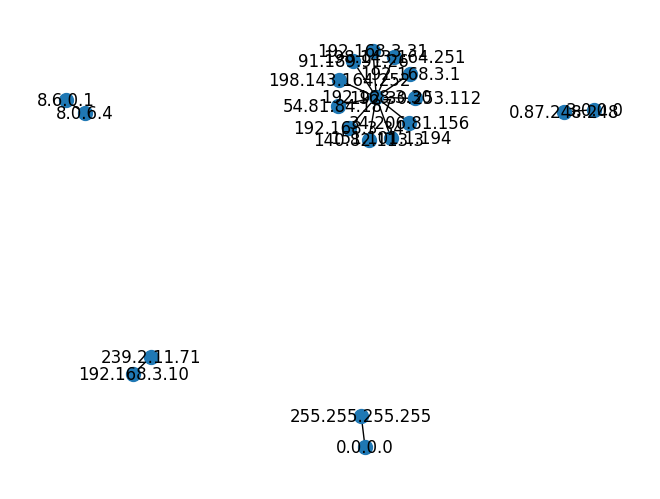

In [66]:
sub_nodes = list(G.nodes)[:20]  # Pick first 20 nodes
subG = G.subgraph(sub_nodes)
nx.draw(subG, with_labels=True, node_size=100)
plt.show()

In [68]:
resampled_data.columns

Index(['Flow ID', 'Src Port', 'Dst Port', 'Protocol', 'Timestamp',
       'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Bwd PSH Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'P

In [108]:

print(resampled_data['Protocol'].unique())

[17.  6.  0.]


In [245]:
resampled_data['binary_activity'] = resampled_data['activity_int'].apply(lambda x: 0 if x == 0 else 1)
print("\nDataframe with new 'binary_activity' column:")
print(resampled_data[['activity_int', 'binary_activity']].head())
print("\nValue counts for 'binary_activity':")
print(resampled_data['binary_activity'].value_counts())


Dataframe with new 'binary_activity' column:
       activity_int  binary_activity
15087             0                0
7829              0                0
28750             0                0
70421             0                0
12351             0                0

Value counts for 'binary_activity':
binary_activity
1    20665
0    10316
Name: count, dtype: int64


In [475]:
resampled_data.columns

Index(['Flow ID', 'Src Port', 'Dst Port', 'Protocol', 'Timestamp',
       'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
       'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Bwd PSH Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Packet Length Min', 'Packet Length Max',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
       'FIN Flag Count', 'SYN Flag Count', 'RST Flag Count', 'P

In [533]:
import pandas as pd

# Copy the cleaned and resampled data
df = resampled_data.copy()

# Ensure IPs are integers
df['Src IP_int'] = df['Src IP_int'].astype(int)
df['Dst IP_int'] = df['Dst IP_int'].astype(int)


In [534]:
# Get all unique IPs in the dataset
unique_ips = pd.unique(df[['Src IP_int', 'Dst IP_int']].values.ravel())
ip_to_index = {ip: idx for idx, ip in enumerate(unique_ips)}  # IP to node index


In [535]:
import torch

src_indices = df['Src IP_int'].map(ip_to_index)
dst_indices = df['Dst IP_int'].map(ip_to_index)

edge_index = torch.tensor([
    list(src_indices) + list(dst_indices),  # both directions
    list(dst_indices) + list(src_indices)
], dtype=torch.long)


In [535]:
from sklearn.preprocessing import StandardScaler

# Drop irrelevant columns for node features
excluded_cols = ['Flow ID', 'Src IP_int', 'Dst IP_int', 'Timestamp',
                 'activity_binary', 'binary_activity', 'stage_int', 'activity_int']

feature_cols = [col for col in df.columns if col not in excluded_cols]

# Normalize flow features
scaler = StandardScaler()
df[feature_cols] = scaler.fit_transform(df[feature_cols])

# Merge flows by IP (both src & dst) to build per-node features
src_df = df[['Src IP_int'] + feature_cols].rename(columns={'Src IP_int': 'IP'})
dst_df = df[['Dst IP_int'] + feature_cols].rename(columns={'Dst IP_int': 'IP'})
all_flows = pd.concat([src_df, dst_df])

node_features_df = all_flows.groupby('IP')[feature_cols].mean().reindex(unique_ips).fillna(0)
x = torch.tensor(node_features_df.values, dtype=torch.float)


In [536]:
# Node label = max of activity_binary across all flows for that IP
ip_labels = df.groupby('Src IP_int')['activity_binary'].max().reindex(unique_ips).fillna(0)
y = torch.tensor(ip_labels.values, dtype=torch.long)


In [537]:
edge_feature_cols = [
    'Protocol', 'Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
    'Src Port', 'Dst Port', 'Subflow Fwd Bytes', 'Subflow Bwd Bytes'
]

df_edge_features = df[['Src IP_int', 'Dst IP_int'] + edge_feature_cols]

# Encode protocol if needed
if df_edge_features['Protocol'].dtype == 'object':
    df_edge_features['Protocol_encoded'] = df_edge_features['Protocol'].astype('category').cat.codes
    edge_feature_cols.remove('Protocol')
    edge_feature_cols.append('Protocol_encoded')
    df_edge_features.drop(columns='Protocol', inplace=True)

# Normalize edge features
edge_scaler = StandardScaler()
edge_attr = torch.tensor(edge_scaler.fit_transform(df_edge_features[edge_feature_cols]), dtype=torch.float)

# Duplicate edge_attr for bidirectional edges
edge_attr = torch.cat([edge_attr, edge_attr], dim=0)



In [538]:
from torch_geometric.data import Data

data = Data(
    x=x,                      # [num_nodes, num_node_features]
    edge_index=edge_index,    # [2, num_edges]
    edge_attr=edge_attr,      # [num_edges, edge_feature_dim]
    y=y                       # [num_nodes]
)

print(data)


Data(x=[482, 68], edge_index=[2, 61962], edge_attr=[61962, 8], y=[482])


In [539]:
from sklearn.model_selection import train_test_split

node_indices = torch.arange(data.num_nodes)
train_idx, temp_idx = train_test_split(node_indices, test_size=0.4, stratify=data.y, random_state=42)
val_idx, test_idx = train_test_split(temp_idx, test_size=0.5, stratify=data.y[temp_idx], random_state=42)

# Create masks
data.train_mask = torch.zeros(data.num_nodes, dtype=torch.bool)
data.val_mask   = torch.zeros(data.num_nodes, dtype=torch.bool)
data.test_mask  = torch.zeros(data.num_nodes, dtype=torch.bool)

data.train_mask[train_idx] = True
data.val_mask[val_idx]     = True
data.test_mask[test_idx]   = True


In [540]:
import torch
import torch.nn.functional as F
from torch.nn import Linear, ReLU, Dropout
from torch_geometric.nn import GATConv


In [541]:
from torch.nn import Module

class GATNet(Module):
    def __init__(self, in_channels, hidden_channels, out_channels, edge_dim):
        super(GATNet, self).__init__()
        self.gat1 = GATConv(in_channels, hidden_channels, edge_dim=edge_dim, add_self_loops=True)
        self.gat2 = GATConv(hidden_channels, out_channels, edge_dim=edge_dim, add_self_loops=True)

    def forward(self, x, edge_index, edge_attr):
        x = self.gat1(x, edge_index, edge_attr)
        x = F.elu(x)
        x = self.gat2(x, edge_index, edge_attr)
        return x


In [542]:
model = GATNet(
    in_channels=data.x.size(1),
    hidden_channels=64,
    out_channels=2,  # Binary classification (malicious or not)
    edge_dim=data.edge_attr.size(1)
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
loss_fn = torch.nn.CrossEntropyLoss()


In [543]:
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index, data.edge_attr)
    loss = loss_fn(out[data.train_mask], data.y[data.train_mask])
    loss.backward()
    optimizer.step()
    return loss.item()

def evaluate(mask):
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index, data.edge_attr)
        pred = out.argmax(dim=1)
        correct = pred[mask] == data.y[mask]
        acc = int(correct.sum()) / int(mask.sum())
        return acc, pred


In [544]:
for epoch in range(1, 101):
    loss = train()
    train_acc, _ = evaluate(data.train_mask)
    val_acc, _ = evaluate(data.val_mask)
    print(f"Epoch {epoch:03d}, Loss: {loss:.4f}, Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")


Epoch 001, Loss: 2.0928, Train Acc: 0.3945, Val Acc: 0.3958
Epoch 002, Loss: 1.1131, Train Acc: 0.6471, Val Acc: 0.5104
Epoch 003, Loss: 0.7368, Train Acc: 0.5813, Val Acc: 0.4688
Epoch 004, Loss: 0.7306, Train Acc: 0.5709, Val Acc: 0.4479
Epoch 005, Loss: 0.7133, Train Acc: 0.5952, Val Acc: 0.4375
Epoch 006, Loss: 0.7219, Train Acc: 0.5917, Val Acc: 0.4583
Epoch 007, Loss: 0.7133, Train Acc: 0.6090, Val Acc: 0.5208
Epoch 008, Loss: 0.7013, Train Acc: 0.6159, Val Acc: 0.5729
Epoch 009, Loss: 0.6930, Train Acc: 0.6367, Val Acc: 0.5833
Epoch 010, Loss: 0.6843, Train Acc: 0.6436, Val Acc: 0.6354
Epoch 011, Loss: 0.6744, Train Acc: 0.6332, Val Acc: 0.6146
Epoch 012, Loss: 0.6633, Train Acc: 0.6263, Val Acc: 0.6146
Epoch 013, Loss: 0.6521, Train Acc: 0.6263, Val Acc: 0.6146
Epoch 014, Loss: 0.6434, Train Acc: 0.6332, Val Acc: 0.6146
Epoch 015, Loss: 0.6390, Train Acc: 0.6367, Val Acc: 0.6146
Epoch 016, Loss: 0.6351, Train Acc: 0.6436, Val Acc: 0.6146
Epoch 017, Loss: 0.6255, Train Acc: 0.65

In [545]:
test_acc, pred = evaluate(data.test_mask)
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.9278


In [546]:
from sklearn.metrics import classification_report

# Evaluate on test set
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index, data.edge_attr)
    y_true = data.y[data.test_mask].cpu()
    y_pred = out[data.test_mask].argmax(dim=1).cpu()

print(classification_report(y_true, y_pred, target_names=["Benign", "APT"]))


              precision    recall  f1-score   support

      Benign       0.90      0.92      0.91        38
         APT       0.95      0.93      0.94        59

    accuracy                           0.93        97
   macro avg       0.92      0.93      0.92        97
weighted avg       0.93      0.93      0.93        97



In [549]:
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx


In [550]:
# Get final predictions from GAT model
model.eval()
with torch.no_grad():
    out = model(data.x, data.edge_index, data.edge_attr)
    pred = out.argmax(dim=1)


In [551]:
# Convert to NetworkX (undirected for better viz)
G = to_networkx(data, to_undirected=True)

# Assign predicted labels as node attributes
for i, p in enumerate(pred.tolist()):
    G.nodes[i]["label"] = p


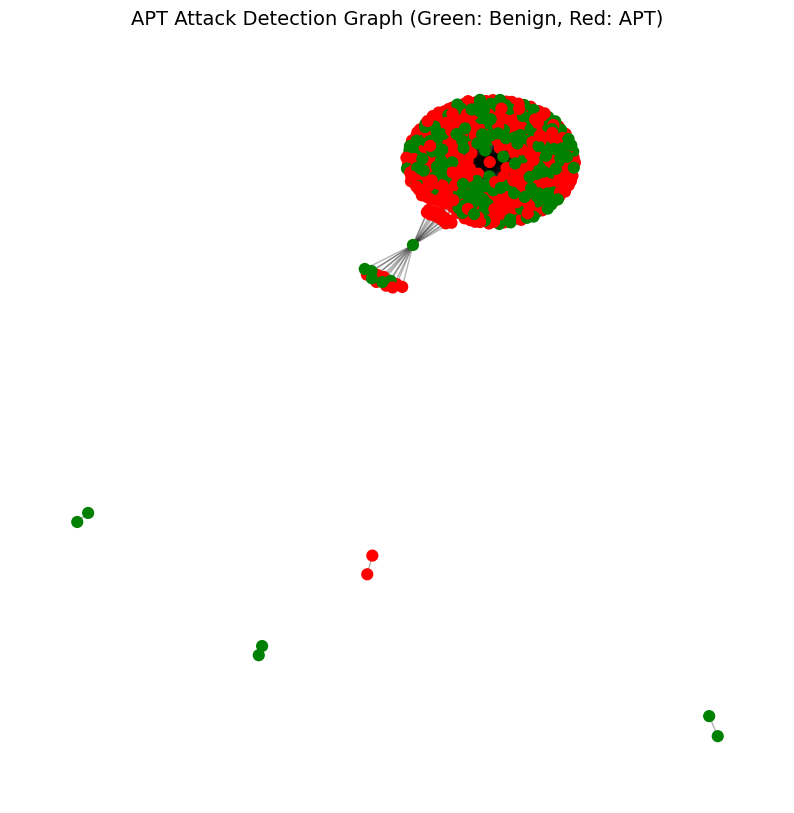

In [552]:
# Define colors for classes
color_map = ['green' if G.nodes[i]['label'] == 0 else 'red' for i in G.nodes]

plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)  # or use nx.kamada_kawai_layout(G)

# Draw graph
nx.draw_networkx_nodes(G, pos, node_color=color_map, node_size=60)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title("APT Attack Detection Graph (Green: Benign, Red: APT)", fontsize=14)
plt.axis('off')
plt.show()


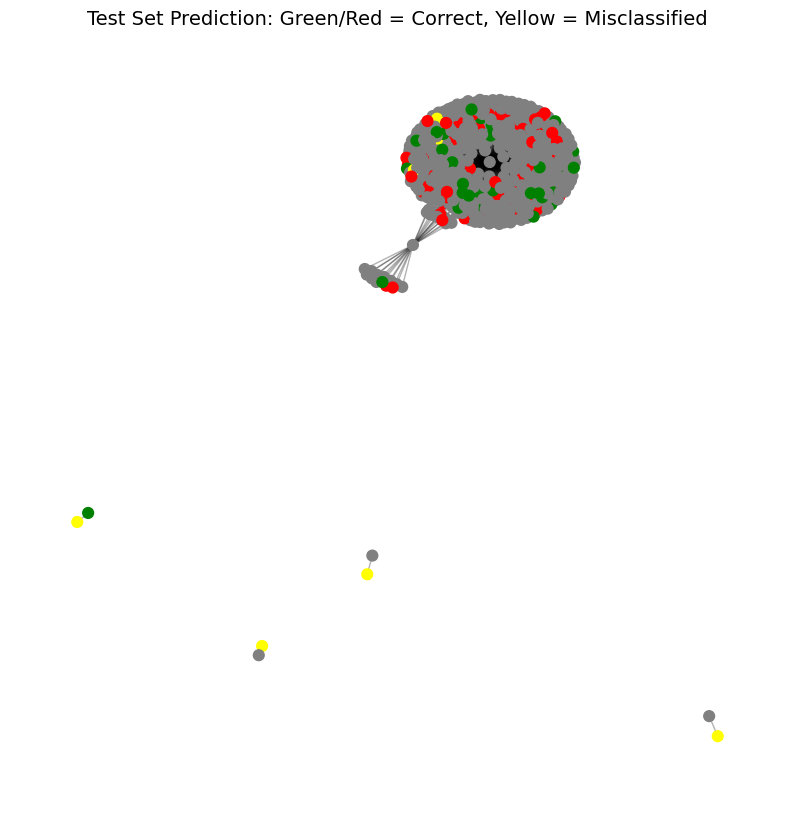

In [553]:
# Compare predicted vs. ground truth on test nodes only
true_labels = data.y.tolist()

# color:
# - Green: True Benign
# - Red: True APT
# - Yellow: Misclassified
node_colors = []
for i in G.nodes:
    if data.test_mask[i]:
        if pred[i] == data.y[i]:
            node_colors.append('green' if data.y[i] == 0 else 'red')
        else:
            node_colors.append('yellow')  # misclassified
    else:
        node_colors.append('gray')  # non-test nodes

plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=60)
nx.draw_networkx_edges(G, pos, alpha=0.3)
plt.title("Test Set Prediction: Green/Red = Correct, Yellow = Misclassified", fontsize=14)
plt.axis('off')
plt.show()
